<a href="https://colab.research.google.com/github/ragabhumi/Pelatihan_Earth_Imaging/blob/main/Pemodelan_Magnet_Bumi_Data_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PELATIHAN TEKNIS EARTH IMAGING - 2023**

**Pemodelan Magnet Bumi menggunakan Data Survey**

oleh: Yosi Setiawan

Pelatihan ini bertujuan untuk memberikan pemahaman dan keahlian dalam melakukan analisis & interpretasi kondisi bawah permukaan bumi menggunakan metode magnet bumi dan aplikasi yang mendukung Earth Imaging guna menunjang tugas dan fungsi sebagai Personal Geofisika.

Pada praktik pengolahan data magnet bumi ini, software yang digunakan adalah Fatiando a Terra (Uieda et.al., 2013) untuk analisis data magnet bumi, dan PyGMT (Uieda et.al., 2023) untuk visualisasi yang keduanya berbasis Python. Pengolahan dilakukan di Google Colab untuk memudahkan akses terhadap program dan data yang digunakan tanpa harus menginstall di komputer atau laptop masing-masing peserta.

Pada bagian ini, data yang akan digunakan adalah **data hasil survey magnet bumi** di wilayah Pelabuhanratu pada tahun 2022.

Langkah pertama yang harus dilakukan adalah menginstal CondaColab di Google Colab di akun Google masing-masing. Tekan tombol **Run cell** di sebelah kiri setiap cell atau tekan tombol Ctrl+Enter. Tunggu hingga proses instalasi selesai. Jika muncul notifikasi **Your session crashed for an unknown reason.**, abaikan dan tutup notifikasi tersebut.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


Selanjutnya, cek apakah instalasi CondaColab telah berhasil. Pastikan hasil yang muncul adalah **Everything looks OK!**.

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


Langkah berikutnya adalah menginstal modul-modul Python yang diperlukan. Proses ini memerlukan waktu yang agak lama. Tunggulah hingga proses selesai.

In [2]:
!mamba install verde harmonica boule pooch pygmt pandas xarray pyigrf xrft rioxarray ensaio pyproj


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['verde', 'harmonica', 'boule', 'pooch', 'pygmt', 'pandas', 'xarray', 'pyigrf', 'xrft', 'rioxarray',

Import modul-modul Python yang akan digunakan


In [3]:
# The standard Python science stack
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import xrft
import datetime
from scipy import signal

# For IGRF correction
import pyIGRF

# For projections (wrapped for Proj)
import pyproj

# Plotting maps using GMT
import pygmt

# The Fatiando stack
import pooch
import verde as vd
import boule as bl
import harmonica as hm

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Data survey magnet bumi yang akan digunakan dalam pelatihan ini telah diupload di Github. Untuk mengunduhnya kita gunakan modul Pooch.

In [4]:
url_mag = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/data_survey.txt'
sha='sha256:98082e487f642b0ed36e1a4fd1bacff1cf53905154b93811a910b3f1cc05715e'
path_mag = pooch.retrieve(url_mag, known_hash=sha)
print(path_mag)

/root/.cache/pooch/fa9291fe0cf72b917709f6cd78e72969-data_survey.txt


Data survey yang telah didownload formatnya adalah txt dan harus diparsing atau ditentukan identitas tiap kolomnya. Khusus untuk kolom yang menunjukkan waktu, ditambahkan perintah agar kolom tersebut terbaca sebagai variabel datetime.

In [5]:
data = pd.read_csv(path_mag, sep='\t')
data['Waktu1'] = pd.to_datetime(data['Waktu1'], format='%Y-%m-%d %H:%M:%S')
data['Waktu2'] = pd.to_datetime(data['Waktu2'], format='%Y-%m-%d %H:%M:%S')
data['Waktu3'] = pd.to_datetime(data['Waktu3'], format='%Y-%m-%d %H:%M:%S')

data

Titik  Latitude  Longitude   Keterangan              Waktu1  \
0    A.27   9225320     672794  Dekat Pagar 2022-04-21 23:47:15   
1    A.29   9225310     672809            - 2022-04-21 23:55:48   
2    A.01   9225500     672611            - 2022-04-22 00:45:25   
3    A.02   9225500     672618            - 2022-04-22 00:43:37   
4    A.06   9225470     672646            - 2022-04-22 00:36:32   
..    ...       ...        ...          ...                 ...   
362  S.27   9225190     672667            - 2022-04-24 00:04:03   
363  S.28   9225190     672674            - 2022-04-24 00:01:39   
364  T.26   9225189     672656            - 2022-04-24 00:07:45   
365  T.27   9225190     672659            - 2022-04-24 00:09:29   
366  T.28   9225180     672667            - 2022-04-24 00:11:10   

                 Waktu2              Waktu3        F1        F2        F3  
0   2022-04-21 23:47:25 2022-04-21 23:47:35  44551.44       NaN  44550.82  
1   2022-04-21 23:55:58 2022-04-21 23:56:08  45099.83  45098.85  44099.84  
2   2022-04-22 00:45:37 2022-04-22 00:45:47       NaN  44732.95  44732.95  
3   2022-04-22 00:43:47 2022-04-22 00:43:57       NaN  44695.52  44695.81  
4   2022-04-22 00:36:42 2022-04-22 00:36:52  44729.19  44730.92  44729.33  
..                  ...                 ...       ...       ...       ...  
362 2022-04-24 00:04:13 2022-04-24 00:04:24  45297.59  45296.31  45295.76  
363 2022-04-24 00:01:50 2022-04-24 00:02:00  45297.91  45298.08  45298.90  
364 2022-04-24 00:07:55 2022-04-24 00:08:06  45228.68  45227.82  45227.40  
365 2022-04-24 00:09:40 2022-04-24 00:09:50       NaN  45263.42  45264.96  
366 2022-04-24 00:11:20 2022-04-24 00:11:30  45259.04  45259.76  45259.99  

[367 rows x 10 columns]

Karena data di tiap titik survey masing-masing dilakukan sebanyak tiga kali pembacaan, kita hitung rata-rata waktu dan rata-rata nilai pembacaan proton dari ketiga pembacaan tersebut.

In [6]:
data['Waktu_rata'] = data.loc[:, ['Waktu1', 'Waktu2', 'Waktu3']].mean(axis=1).dt.strftime('%Y-%m-%d %H:%M:%S')
data['F_rata'] = data.loc[:, ['F1', 'F2', 'F3']].mean(axis=1).map('{:.2f}'.format)
data

Titik  Latitude  Longitude   Keterangan              Waktu1  \
0    A.27   9225320     672794  Dekat Pagar 2022-04-21 23:47:15   
1    A.29   9225310     672809            - 2022-04-21 23:55:48   
2    A.01   9225500     672611            - 2022-04-22 00:45:25   
3    A.02   9225500     672618            - 2022-04-22 00:43:37   
4    A.06   9225470     672646            - 2022-04-22 00:36:32   
..    ...       ...        ...          ...                 ...   
362  S.27   9225190     672667            - 2022-04-24 00:04:03   
363  S.28   9225190     672674            - 2022-04-24 00:01:39   
364  T.26   9225189     672656            - 2022-04-24 00:07:45   
365  T.27   9225190     672659            - 2022-04-24 00:09:29   
366  T.28   9225180     672667            - 2022-04-24 00:11:10   

                 Waktu2              Waktu3        F1        F2        F3  \
0   2022-04-21 23:47:25 2022-04-21 23:47:35  44551.44       NaN  44550.82   
1   2022-04-21 23:55:58 2022-04-21 23:56:08  45099.83  45098.85  44099.84   
2   2022-04-22 00:45:37 2022-04-22 00:45:47       NaN  44732.95  44732.95   
3   2022-04-22 00:43:47 2022-04-22 00:43:57       NaN  44695.52  44695.81   
4   2022-04-22 00:36:42 2022-04-22 00:36:52  44729.19  44730.92  44729.33   
..                  ...                 ...       ...       ...       ...   
362 2022-04-24 00:04:13 2022-04-24 00:04:24  45297.59  45296.31  45295.76   
363 2022-04-24 00:01:50 2022-04-24 00:02:00  45297.91  45298.08  45298.90   
364 2022-04-24 00:07:55 2022-04-24 00:08:06  45228.68  45227.82  45227.40   
365 2022-04-24 00:09:40 2022-04-24 00:09:50       NaN  45263.42  45264.96   
366 2022-04-24 00:11:20 2022-04-24 00:11:30  45259.04  45259.76  45259.99   

              Waktu_rata    F_rata  
0    2022-04-21 23:47:25  44551.13  
1    2022-04-21 23:55:58  44766.17  
2    2022-04-22 00:45:36  44732.95  
3    2022-04-22 00:43:46  44695.66  
4    2022-04-22 00:36:42  44729.81  
..                   ...       ...  
362  2022-04-24 00:04:13  45296.55  
363  2022-04-24 00:01:49  45298.30  
364  2022-04-24 00:07:55  45227.97  
365  2022-04-24 00:09:39  45264.19  
366  2022-04-24 00:11:20  45259.60  

[367 rows x 12 columns]

Untuk menampilkan titik-titik lokasi survey, kita buat peta menggunakan modul PyGMT. Variabel **region** menunjukkan batas koordinat lokasi dengan urutan kiri, kanan, bawah, dan atas peta.

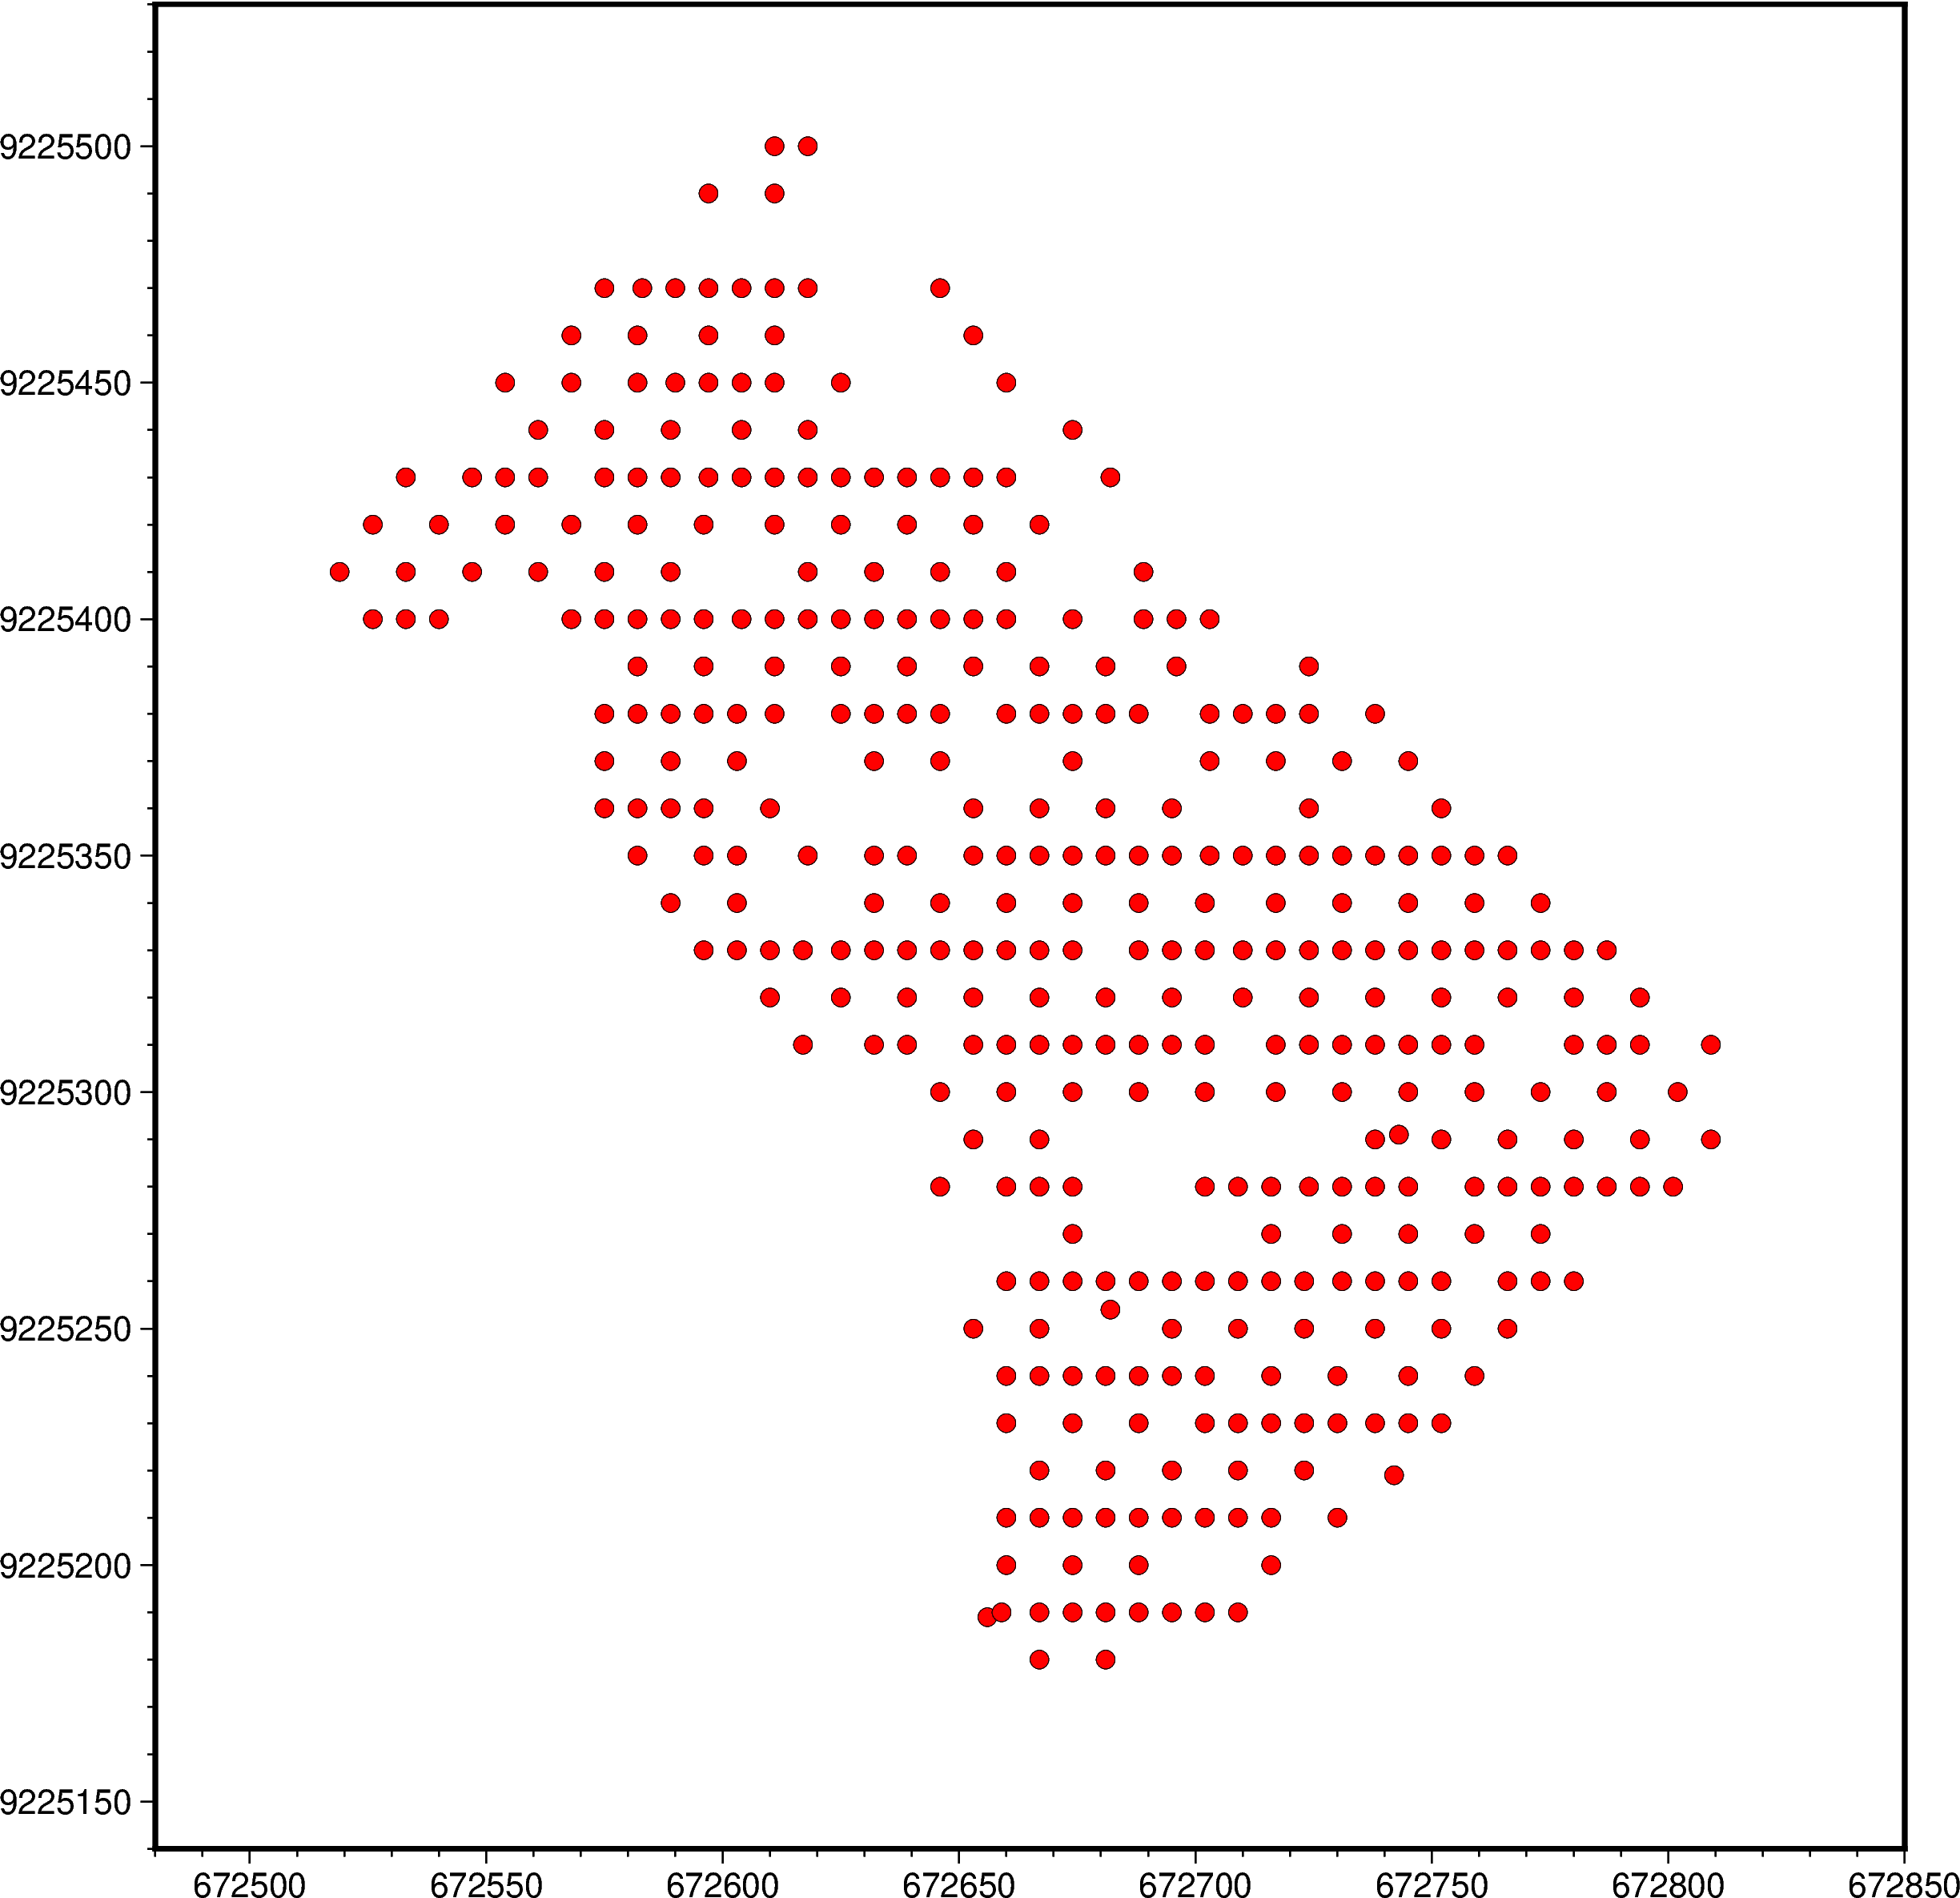

In [7]:
fig = pygmt.Figure()
fig.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=True)
fig.plot(x=data['Longitude'], y=data['Latitude'],
    style="c0.20c",
    fill="red",
    pen="faint")
fig.show()

Selanjutnya, kita import data proton base station yang juga telah diupload di Github. Survey magnet bumi ini dilakukan selama 4 hari, sehingga data proton base station juga sebanyak 4 file.

In [8]:
# Base station hari 1
url_base = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/proton_base_20-04-2022.txt'
sha ='sha256:bb7f245ef8d0e3f1b9ec0e061cd1413e5b6557508a40d5392960dd014cd1ae7b'
base_day1 = pooch.retrieve(url_base, known_hash=sha)
print(base_day1)

# Base station hari 2
url_base = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/proton_base_21-04-2022.txt'
sha ='sha256:f4af8f4db524bc21494087bbba540141168388e506de4616341ddb6ba53eda61'
base_day2 = pooch.retrieve(url_base, known_hash=sha)
print(base_day2)

# Base station hari 3
url_base = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/proton_base_22-04-2022.txt'
sha ='sha256:6bd280b081841396114c092c5e5004efc7888031e4ba3fa33449f5c7a3c38403'
base_day3 = pooch.retrieve(url_base, known_hash=sha)
print(base_day3)

# Base station hari 4
url_base = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/proton_base_23-04-2022.txt'
sha ='sha256:cb17d1b0a88143a5767eae201288cd46335b890f0be264135e61f4d27cc58ff4'
base_day4 = pooch.retrieve(url_base, known_hash=sha)
print(base_day4)

# Base station hari 5
url_base = 'https://raw.githubusercontent.com/ragabhumi/Pelatihan_Earth_Imaging/main/data/proton_base_24-04-2022.txt'
sha ='sha256:28421c6869802d7d49fee951c6a082d95e76dbf1a9eaf4a9a7ad139066214796'
base_day5 = pooch.retrieve(url_base, known_hash=sha)
print(base_day5)

/root/.cache/pooch/deb00fdc051958a36b92666379747c85-proton_base_20-04-2022.txt


/root/.cache/pooch/32dfda184c879a53f1a0796cb0e442f7-proton_base_21-04-2022.txt
/root/.cache/pooch/2dc6f6367f31180650808366ffe005f7-proton_base_22-04-2022.txt


/root/.cache/pooch/f54ce8cd0706eee0ba2ecf7e0f40373d-proton_base_23-04-2022.txt
/root/.cache/pooch/ef39ea3ebbf3c7d3d287bdb88a2544cf-proton_base_24-04-2022.txt


Data proton base station yang telah didownload, selanjutnya diparsing menggunakan modul Pandas. Seperti sebelumnya, khusus untuk kolom yang menunjukkan waktu, ditambahkan perintah agar kolom tersebut terbaca sebagai variabel datetime.

In [9]:
base1 = pd.read_csv(base_day1, sep='\t', names=['Waktu', 'Fbase'])
base2 = pd.read_csv(base_day2, sep='\t', names=['Waktu', 'Fbase'])
base3 = pd.read_csv(base_day3, sep='\t', names=['Waktu', 'Fbase'])
base4 = pd.read_csv(base_day4, sep='\t', names=['Waktu', 'Fbase'])
base5 = pd.read_csv(base_day5, sep='\t', names=['Waktu', 'Fbase'])

base1['Waktu'] = pd.to_datetime(base1['Waktu'], format='%Y-%m-%d %H:%M:%S')
base2['Waktu'] = pd.to_datetime(base2['Waktu'], format='%Y-%m-%d %H:%M:%S')
base3['Waktu'] = pd.to_datetime(base3['Waktu'], format='%Y-%m-%d %H:%M:%S')
base4['Waktu'] = pd.to_datetime(base4['Waktu'], format='%Y-%m-%d %H:%M:%S')
base5['Waktu'] = pd.to_datetime(base5['Waktu'], format='%Y-%m-%d %H:%M:%S')

base1

Waktu    Fbase
0    2022-04-20 00:00:00  45284.7
1    2022-04-20 00:00:10  45284.8
2    2022-04-20 00:00:20  45285.2
3    2022-04-20 00:00:30  45285.4
4    2022-04-20 00:00:40  45284.9
...                  ...      ...
8633 2022-04-20 23:59:10  45274.8
8634 2022-04-20 23:59:20  45275.8
8635 2022-04-20 23:59:30  45275.8
8636 2022-04-20 23:59:40  45275.6
8637 2022-04-20 23:59:50  45276.1

[8638 rows x 2 columns]

Selanjutnya kita gabungkan data proton base station menjadi satu variabel

In [10]:
base = pd.concat([base1, base2, base3, base4, base5]).reset_index(drop=True)
base

Waktu    Fbase
0     2022-04-20 00:00:00  45284.7
1     2022-04-20 00:00:10  45284.8
2     2022-04-20 00:00:20  45285.2
3     2022-04-20 00:00:30  45285.4
4     2022-04-20 00:00:40  45284.9
...                   ...      ...
34277 2022-04-24 00:51:38  45283.7
34278 2022-04-24 00:51:48  45283.7
34279 2022-04-24 00:51:58  45284.3
34280 2022-04-24 00:52:08  45283.7
34281 2022-04-24 00:52:18  45284.1

[34282 rows x 2 columns]

Tampilkan grafik variasi harian dari data proton base station yang telah digabungkan.

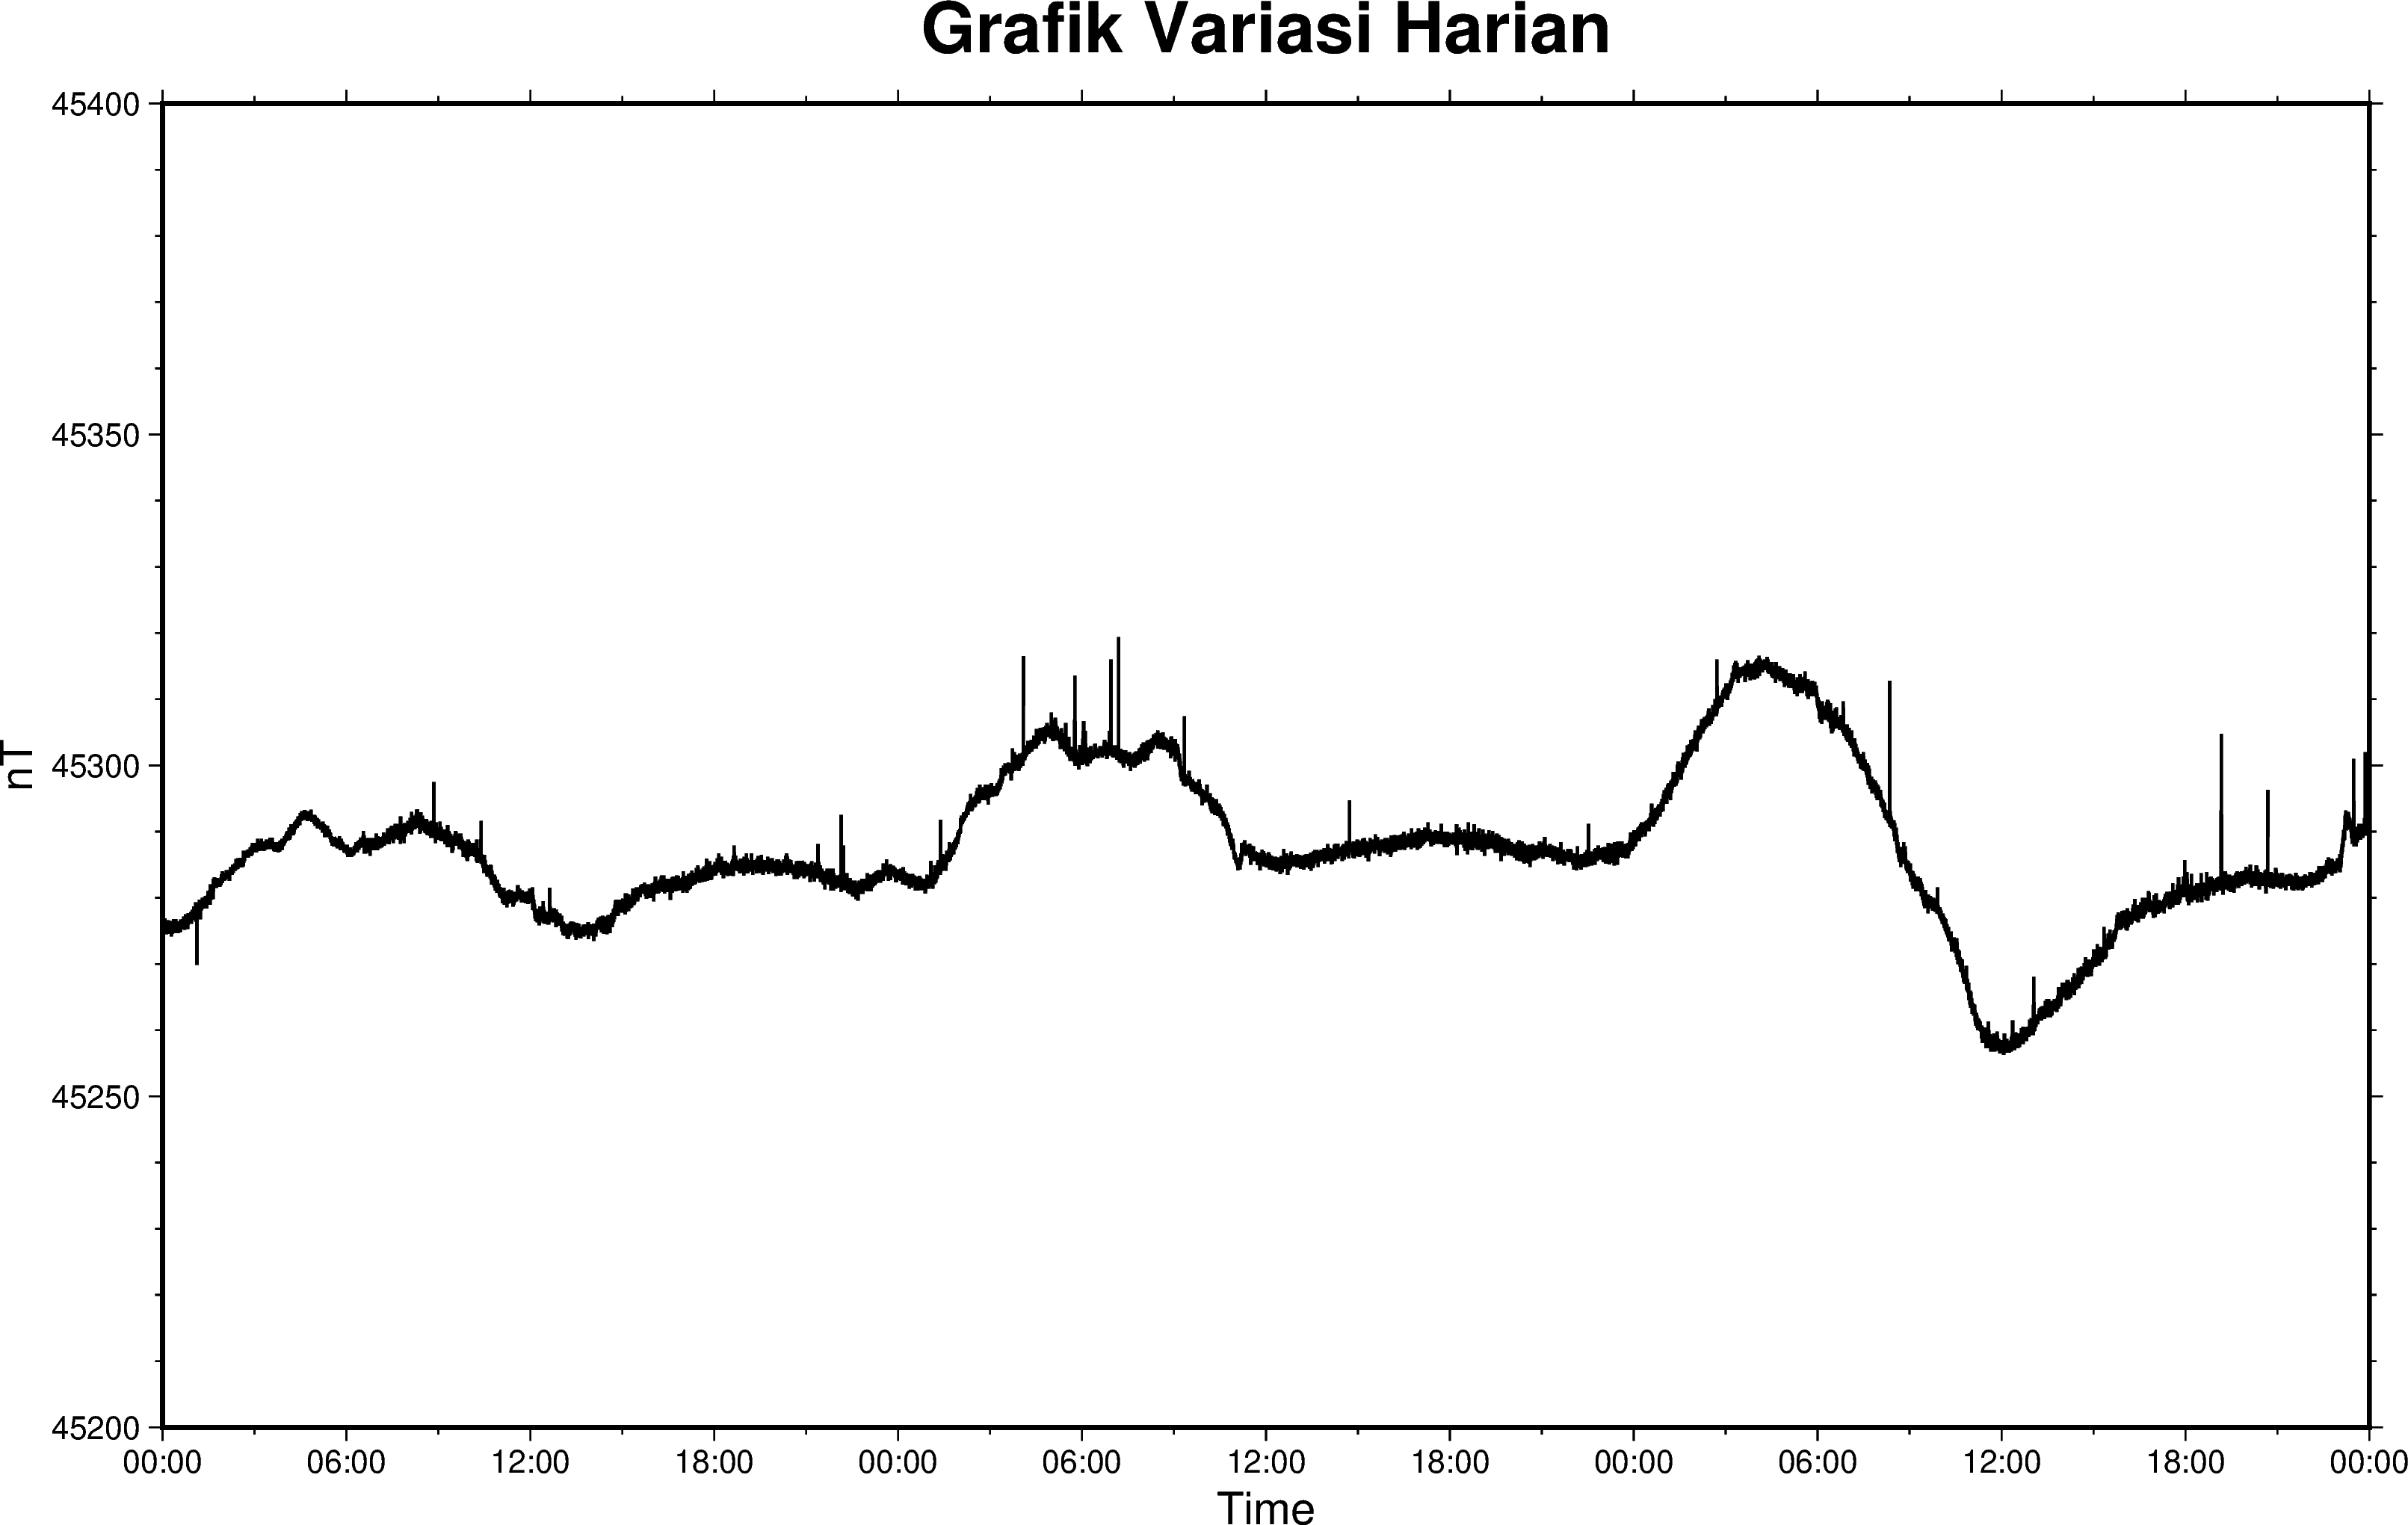

In [14]:
fig = pygmt.Figure()
# create a basemap with limits of 2022-04-21 to 2022-04-24 on the x axis and
# 45200 to 45400 on the y axis
fig.basemap(
    projection="X25c/15c",
    region=[datetime.date(2022, 4, 21), datetime.date(2022, 4, 24), 45200, 45400],
    frame=["WSen+tGrafik Variasi Harian", "af", "x+lTime", "y+lnT"],
)

x = base['Waktu']
y = base['Fbase']
fig.plot(x=x, y=y, pen="1p")

fig.show()

Terlihat bahwa pada data variasi harian masih terdapat banyak spike. Selanjutnya, kita hilangkan spike-spike tersebut menggunakan median filter.

In [15]:
base['Fbase_filt'] = signal.medfilt(base['Fbase'])

Tampilkan grafik variasi harian setelah di filter.

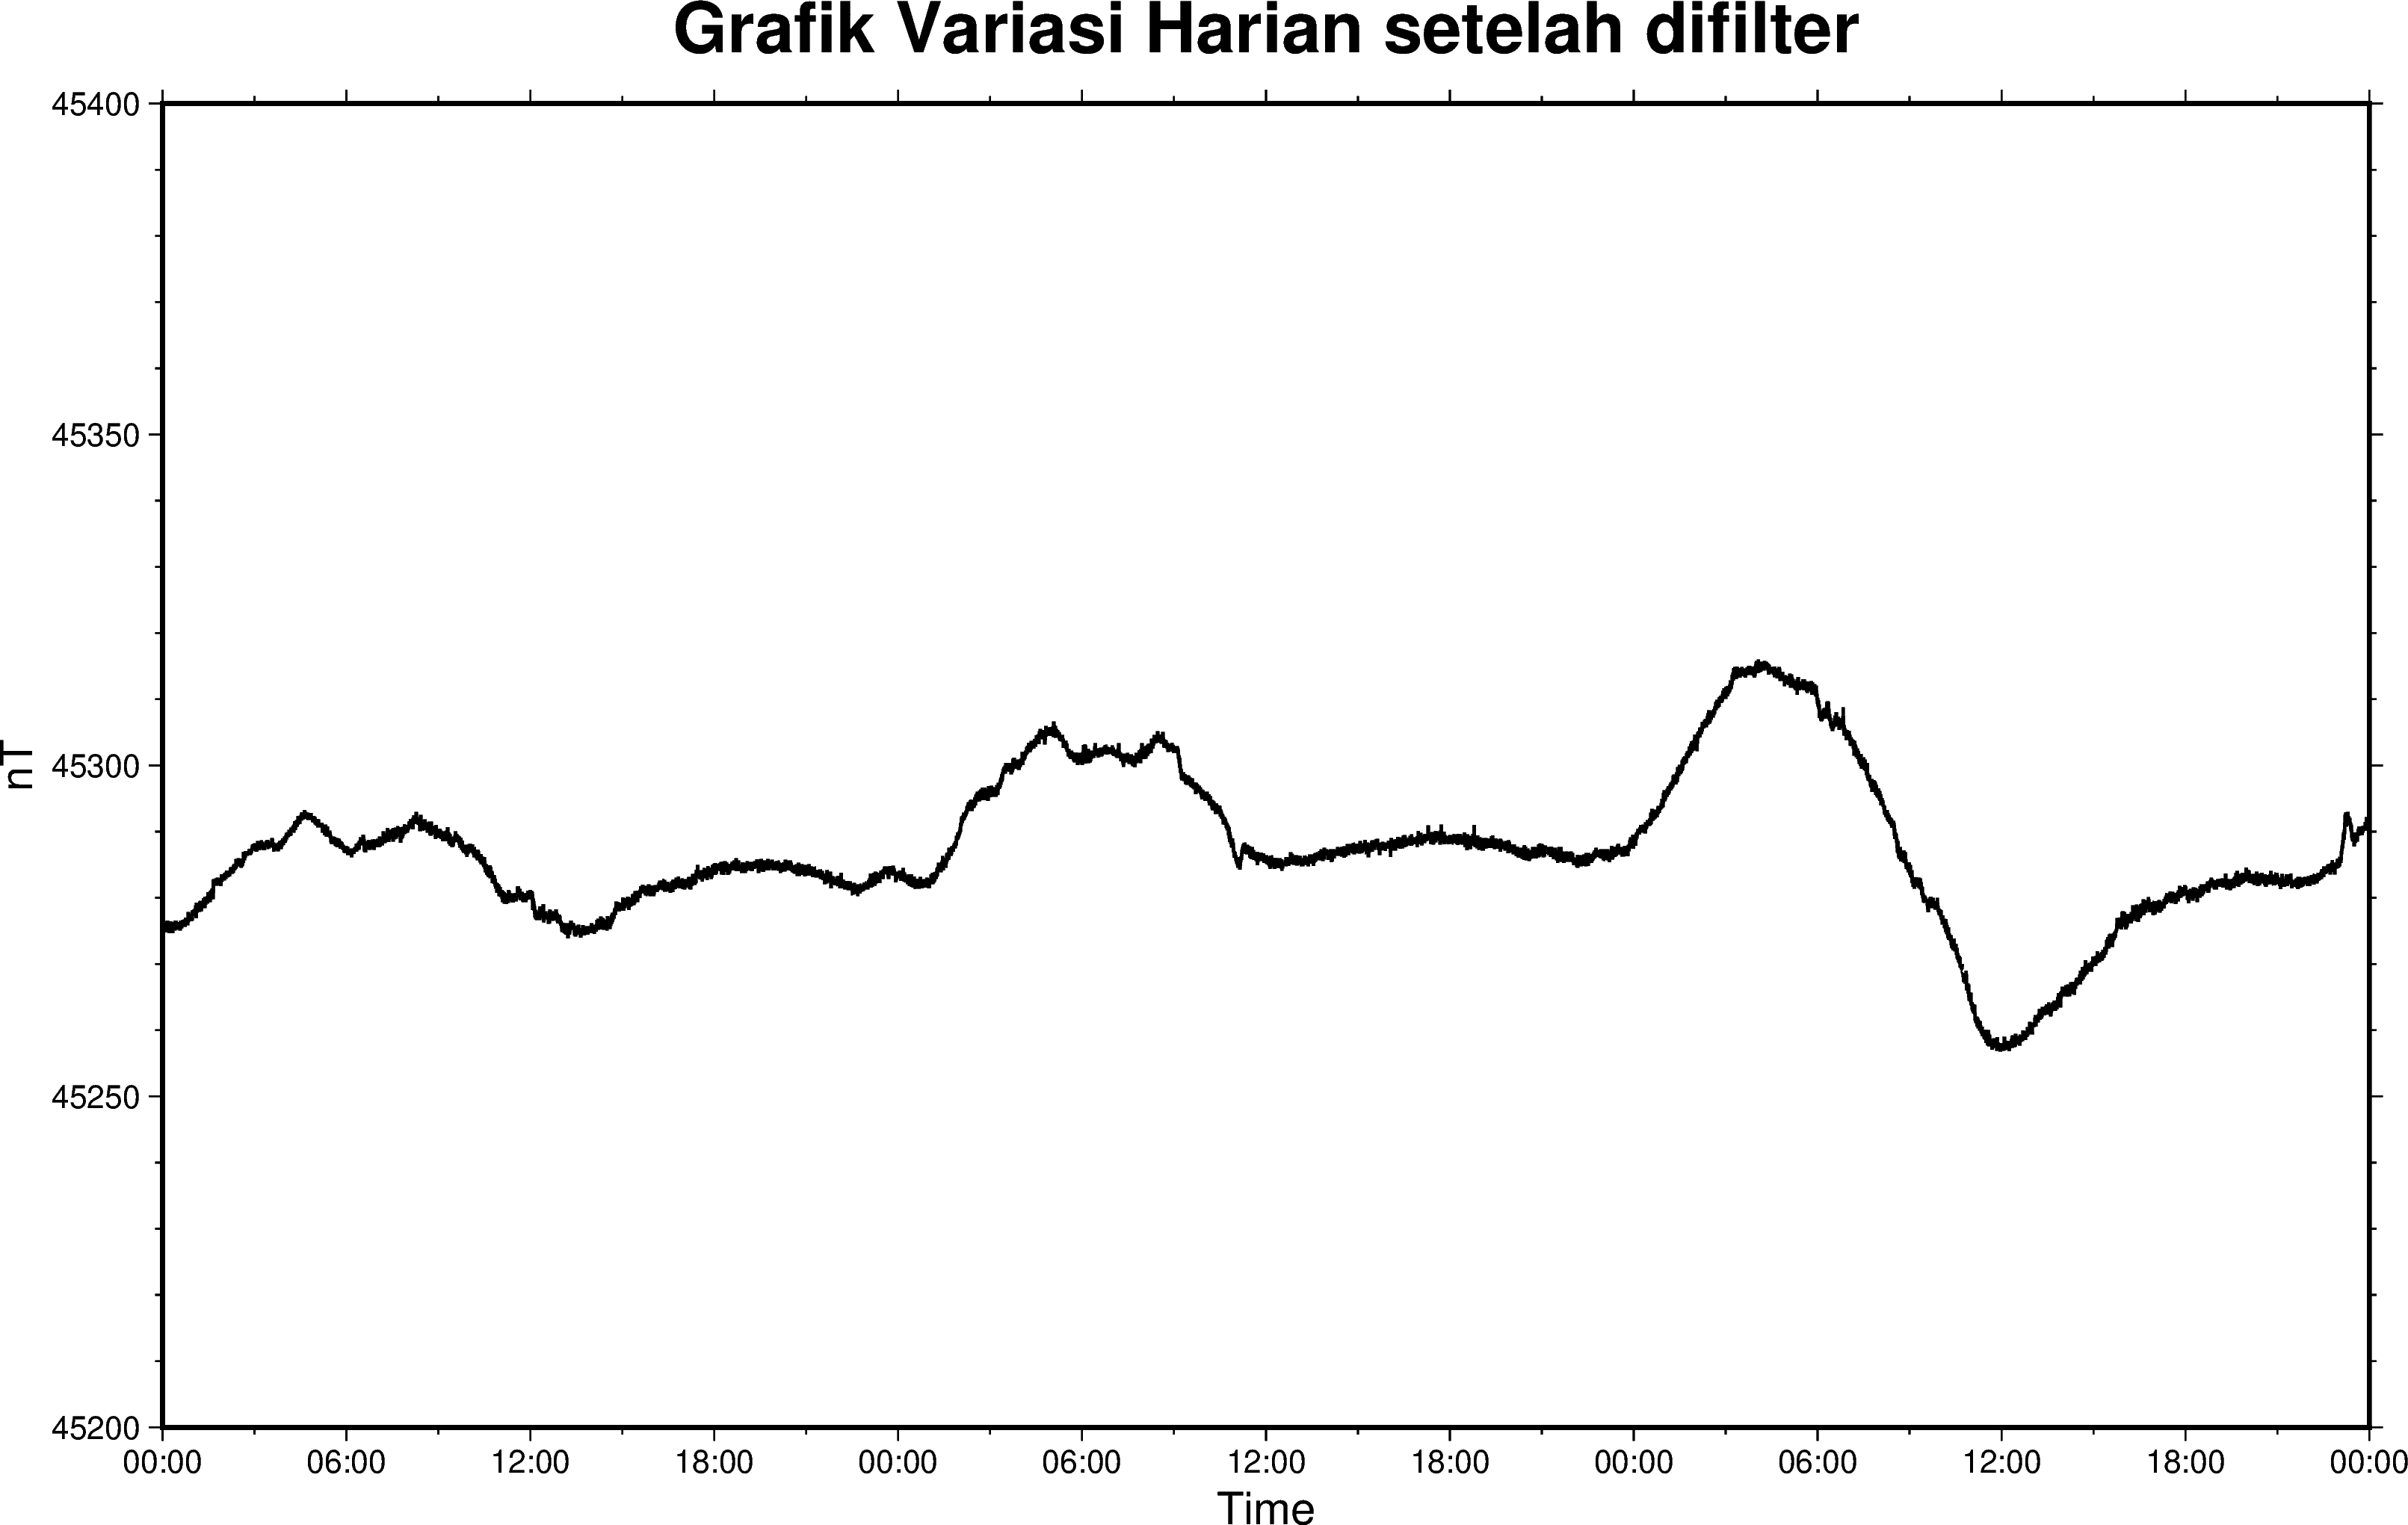

In [16]:
fig = pygmt.Figure()
# create a basemap with limits of 2022-04-21 to 2022-04-24 on the x axis and
# 45200 to 45400 on the y axis
fig.basemap(
    projection="X25c/15c",
    region=[datetime.date(2022, 4, 21), datetime.date(2022, 4, 24), 45200, 45400],
    frame=["WSen+tGrafik Variasi Harian setelah difilter", "af", "x+lTime", "y+lnT"],
)

x = base['Waktu']
y = base['Fbase_filt']
fig.plot(x=x, y=y, pen="1p")

fig.show()

Jika kita perhatikan, interval data proton base station adalah 10 detik, sedangkan hasil pengukuran di titik survey resolusinya 1 detik. Sehingga nilai proton base station harus di up sampling agar menjadi 1 detik.

In [17]:
base1s = base.set_index(['Waktu'])
base1s = base1s.resample(rule='1S').mean().interpolate(method='linear')
base1s

Fbase  Fbase_filt
Waktu                                    
2022-04-20 00:00:00  45284.70    45284.70
2022-04-20 00:00:01  45284.71    45284.71
2022-04-20 00:00:02  45284.72    45284.72
2022-04-20 00:00:03  45284.73    45284.73
2022-04-20 00:00:04  45284.74    45284.74
...                       ...         ...
2022-04-24 00:52:14  45283.94    45283.86
2022-04-24 00:52:15  45283.98    45283.82
2022-04-24 00:52:16  45284.02    45283.78
2022-04-24 00:52:17  45284.06    45283.74
2022-04-24 00:52:18  45284.10    45283.70

[348739 rows x 2 columns]

Setelah data proton hasil survei dan data proton base station selesai disiapkan, kita lakukan pengolahan untuk mendapatkan kontur anomali magnet bumi. Untuk mendapatkan anomali medan magnetik yang menjadi target survei, maka data magnetik yang telah diperoleh harus dibersihkan atau dikoreksi dari pengaruh beberapa medan magnet yang lain. Flowchart dalam pengolahan data magnet bumi adalah sebagai berikut:


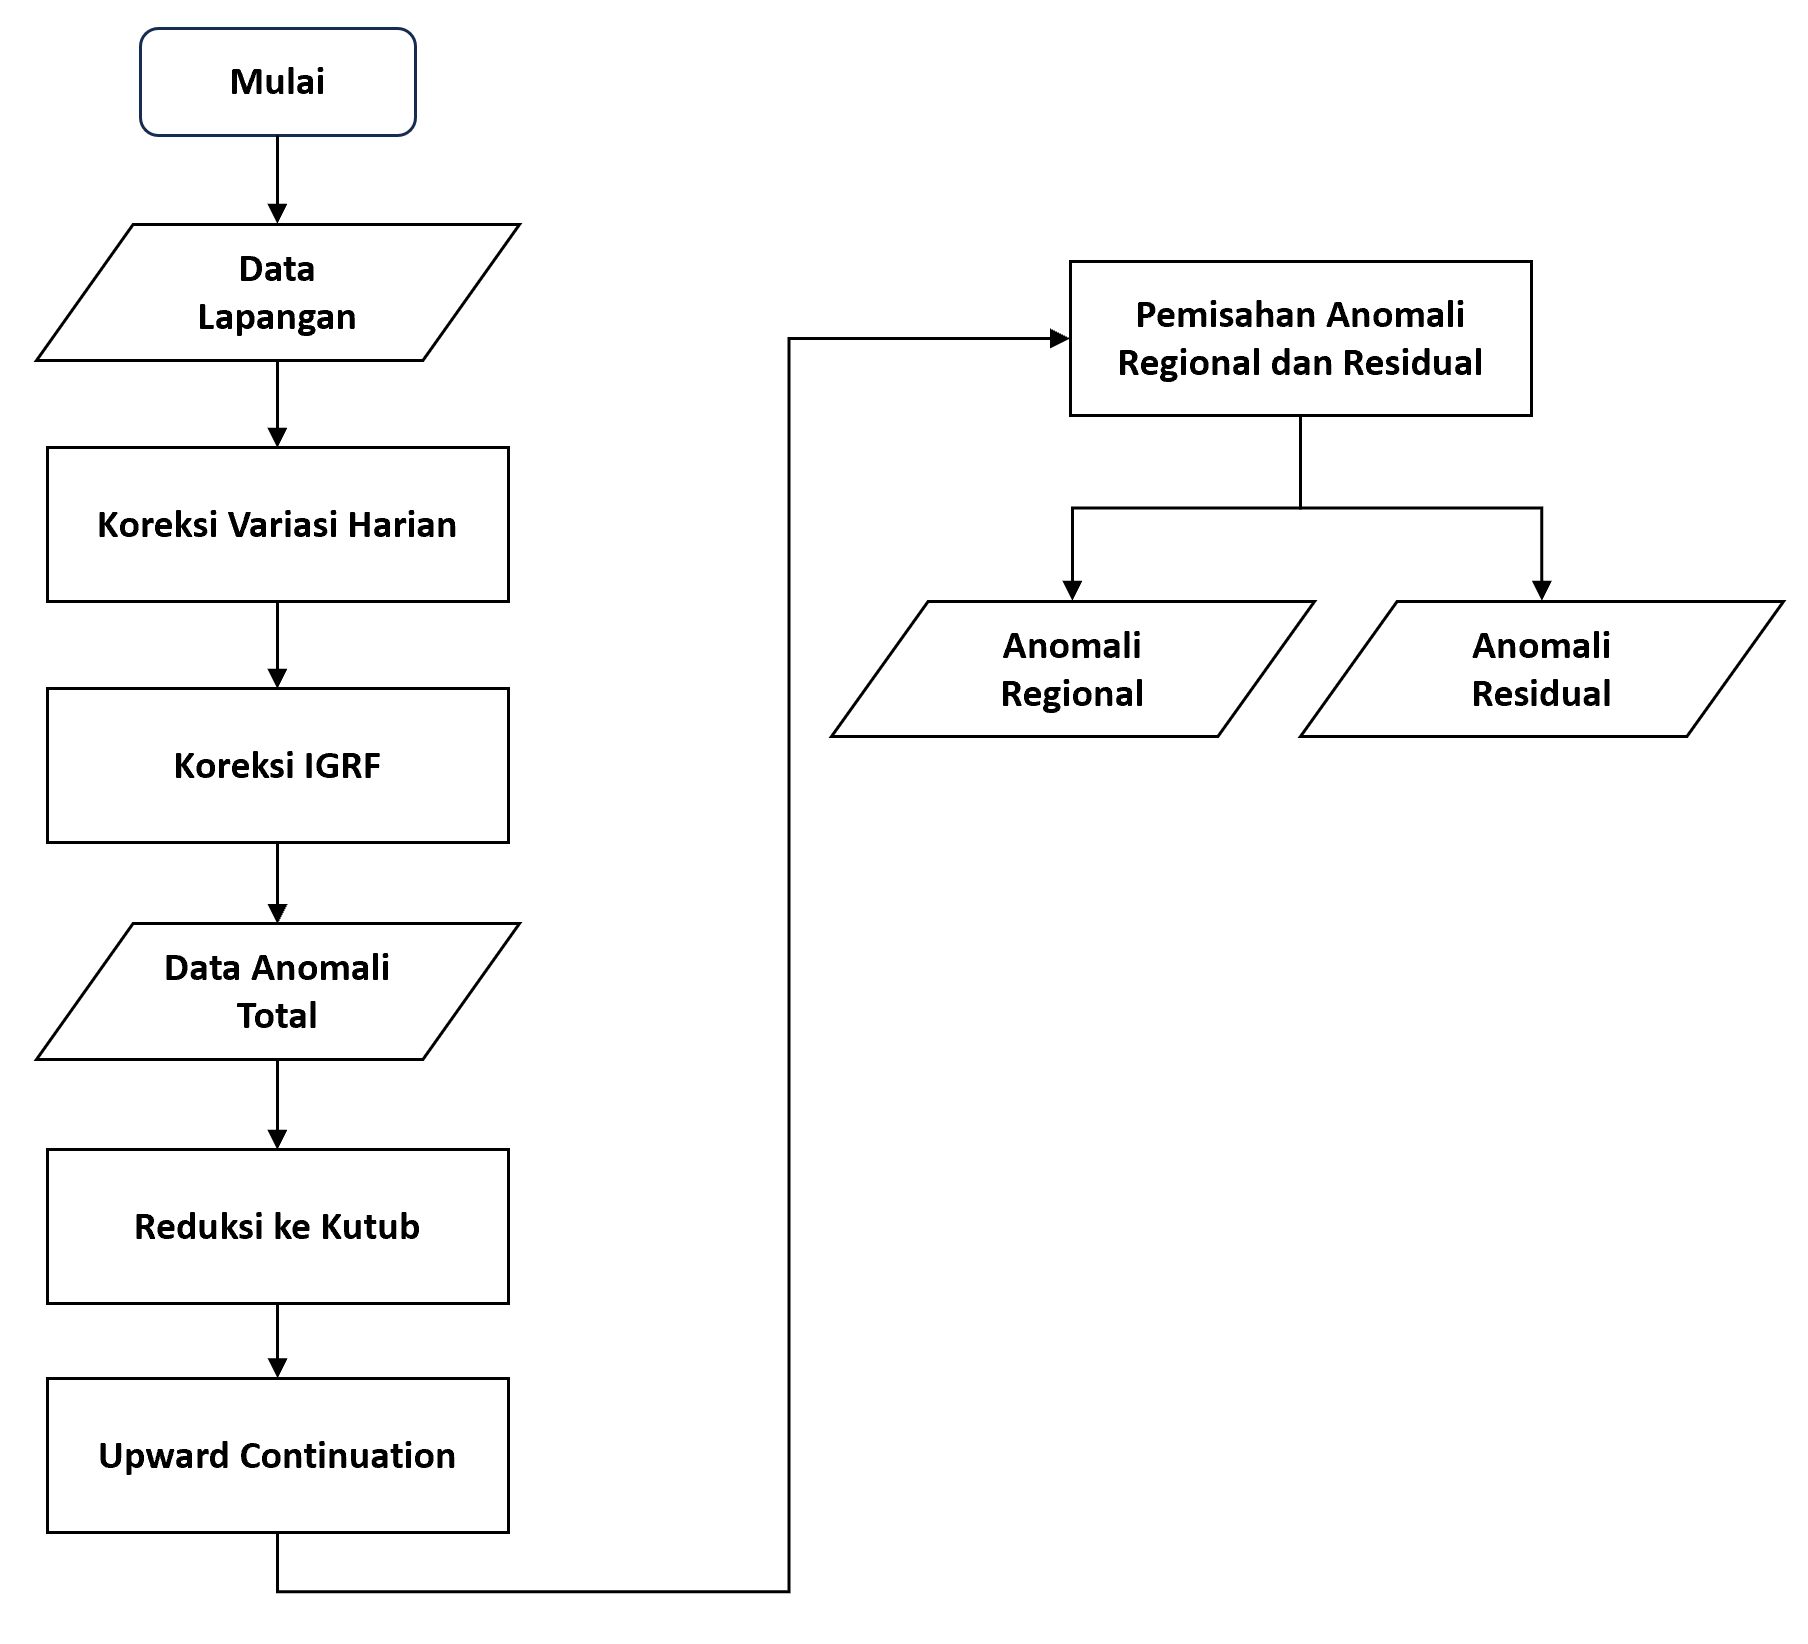

**1. Koreksi Diurnal**

Langkah pertama adalah melakukan koreksi variasi harian. Koreksi diurnal (diurnal correction) atau koreksi harian merupakan koreksi untuk menghilangkan efek dari penyimpangan nilai medan magnet bumi akibat adanya perbedaan waktu dan efek radiasi matahari dalam satu hari. Waktu yang dimaksudkan harus mengacu atau sesuai dengan waktu pengukuran data medan magnet di setiap titik lokasi (stasiun pengukuran) yang akan dikoreksi. Koreksi diurnal dapat dituliskan dalam persamaan:

ΔH = H TOTAL ± ΔH HARIAN 

dimana ΔH adalah medan magnet terkoreksi, H TOTAL adalah medan magnet terukur oleh alat, dan ΔH HARIAN adalah nilai koreksi variasi harian.

Untuk menghitung nilai variasi diurnal, data proton base station dapat dikurangkan dengan nilai pertamanya.

In [18]:
base1s['VH'] = base1s['Fbase_filt'] - base1s['Fbase_filt'][0]
base1s

Fbase  Fbase_filt    VH
Waktu                                          
2022-04-20 00:00:00  45284.70    45284.70  0.00
2022-04-20 00:00:01  45284.71    45284.71  0.01
2022-04-20 00:00:02  45284.72    45284.72  0.02
2022-04-20 00:00:03  45284.73    45284.73  0.03
2022-04-20 00:00:04  45284.74    45284.74  0.04
...                       ...         ...   ...
2022-04-24 00:52:14  45283.94    45283.86 -0.84
2022-04-24 00:52:15  45283.98    45283.82 -0.88
2022-04-24 00:52:16  45284.02    45283.78 -0.92
2022-04-24 00:52:17  45284.06    45283.74 -0.96
2022-04-24 00:52:18  45284.10    45283.70 -1.00

[348739 rows x 3 columns]

Selanjutnya, untuk melakukan perhitungan koreksi diurnal, jam pengamatan pada proton base station disesuaikan dengan waktu rata-rata pembacaan proton hasil survey.

In [19]:
data['VH'] = base1s.loc[data['Waktu_rata']].reset_index()['VH']
data

Titik  Latitude  Longitude   Keterangan              Waktu1  \
0    A.27   9225320     672794  Dekat Pagar 2022-04-21 23:47:15   
1    A.29   9225310     672809            - 2022-04-21 23:55:48   
2    A.01   9225500     672611            - 2022-04-22 00:45:25   
3    A.02   9225500     672618            - 2022-04-22 00:43:37   
4    A.06   9225470     672646            - 2022-04-22 00:36:32   
..    ...       ...        ...          ...                 ...   
362  S.27   9225190     672667            - 2022-04-24 00:04:03   
363  S.28   9225190     672674            - 2022-04-24 00:01:39   
364  T.26   9225189     672656            - 2022-04-24 00:07:45   
365  T.27   9225190     672659            - 2022-04-24 00:09:29   
366  T.28   9225180     672667            - 2022-04-24 00:11:10   

                 Waktu2              Waktu3        F1        F2        F3  \
0   2022-04-21 23:47:25 2022-04-21 23:47:35  44551.44       NaN  44550.82   
1   2022-04-21 23:55:58 2022-04-21 23:56:08  45099.83  45098.85  44099.84   
2   2022-04-22 00:45:37 2022-04-22 00:45:47       NaN  44732.95  44732.95   
3   2022-04-22 00:43:47 2022-04-22 00:43:57       NaN  44695.52  44695.81   
4   2022-04-22 00:36:42 2022-04-22 00:36:52  44729.19  44730.92  44729.33   
..                  ...                 ...       ...       ...       ...   
362 2022-04-24 00:04:13 2022-04-24 00:04:24  45297.59  45296.31  45295.76   
363 2022-04-24 00:01:50 2022-04-24 00:02:00  45297.91  45298.08  45298.90   
364 2022-04-24 00:07:55 2022-04-24 00:08:06  45228.68  45227.82  45227.40   
365 2022-04-24 00:09:40 2022-04-24 00:09:50       NaN  45263.42  45264.96   
366 2022-04-24 00:11:20 2022-04-24 00:11:30  45259.04  45259.76  45259.99   

              Waktu_rata    F_rata    VH  
0    2022-04-21 23:47:25  44551.13 -0.80  
1    2022-04-21 23:55:58  44766.17 -1.40  
2    2022-04-22 00:45:36  44732.95 -2.70  
3    2022-04-22 00:43:46  44695.66 -2.40  
4    2022-04-22 00:36:42  44729.81 -2.70  
..                   ...       ...   ...  
362  2022-04-24 00:04:13  45296.55  4.91  
363  2022-04-24 00:01:49  45298.30  5.38  
364  2022-04-24 00:07:55  45227.97  4.65  
365  2022-04-24 00:09:39  45264.19  4.16  
366  2022-04-24 00:11:20  45259.60  3.80  

[367 rows x 13 columns]

**2. Koreksi IGRF**

Data hasil pengukuran medan magnet pada dasarnya adalah konstribusi dari tiga komponen dasar, yaitu medan magnet utama bumi, medan magnet eksternal dan medan anomali. Nilai medan magnetik utama tidak lain adalah nilai IGRF (*International Geomagnetic Reference Field*). Jika nilai medan magnet utama dihilangkan dengan koreksi harian, maka kontribusi medan magnetik utama dihilangkan dengan koreksi IGRF. Koreksi IGRF dapat dilakukan dengan cara mengurangkan nilai IGRF terhadap nilai medan magnet total yang telah terkoreksi harian pada setiap titik pengukuran pada posisi geografis yang sesuai. Persamaan koreksinya (setelah dikoreksi harian) dapat dituliskan sebagai berikut :

ΔH = H TOTAL ± ΔH HARIAN - H IGRF

dimana H IGRF adalah nilai IGRF

In [20]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

IGRF = []
for i in range(len(data)):
    myProj = pyproj.Proj("+proj=utm +zone=48 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    lon_,lat_ = myProj(data['Longitude'].iloc[i], data['Latitude'].iloc[i], inverse=True)
    date = datetime.datetime.strptime(data['Waktu_rata'].iloc[i], '%Y-%m-%d %H:%M:%S')
    t = float('%.2f'%year_fraction(date))
    
    IGRF = IGRF + [pyIGRF.igrf_value(lat_, lon_, 0, t)[-1]]

data['IGRF'] = IGRF

data

Titik  Latitude  Longitude   Keterangan              Waktu1  \
0    A.27   9225320     672794  Dekat Pagar 2022-04-21 23:47:15   
1    A.29   9225310     672809            - 2022-04-21 23:55:48   
2    A.01   9225500     672611            - 2022-04-22 00:45:25   
3    A.02   9225500     672618            - 2022-04-22 00:43:37   
4    A.06   9225470     672646            - 2022-04-22 00:36:32   
..    ...       ...        ...          ...                 ...   
362  S.27   9225190     672667            - 2022-04-24 00:04:03   
363  S.28   9225190     672674            - 2022-04-24 00:01:39   
364  T.26   9225189     672656            - 2022-04-24 00:07:45   
365  T.27   9225190     672659            - 2022-04-24 00:09:29   
366  T.28   9225180     672667            - 2022-04-24 00:11:10   

                 Waktu2              Waktu3        F1        F2        F3  \
0   2022-04-21 23:47:25 2022-04-21 23:47:35  44551.44       NaN  44550.82   
1   2022-04-21 23:55:58 2022-04-21 23:56:08  45099.83  45098.85  44099.84   
2   2022-04-22 00:45:37 2022-04-22 00:45:47       NaN  44732.95  44732.95   
3   2022-04-22 00:43:47 2022-04-22 00:43:57       NaN  44695.52  44695.81   
4   2022-04-22 00:36:42 2022-04-22 00:36:52  44729.19  44730.92  44729.33   
..                  ...                 ...       ...       ...       ...   
362 2022-04-24 00:04:13 2022-04-24 00:04:24  45297.59  45296.31  45295.76   
363 2022-04-24 00:01:50 2022-04-24 00:02:00  45297.91  45298.08  45298.90   
364 2022-04-24 00:07:55 2022-04-24 00:08:06  45228.68  45227.82  45227.40   
365 2022-04-24 00:09:40 2022-04-24 00:09:50       NaN  45263.42  45264.96   
366 2022-04-24 00:11:20 2022-04-24 00:11:30  45259.04  45259.76  45259.99   

              Waktu_rata    F_rata    VH          IGRF  
0    2022-04-21 23:47:25  44551.13 -0.80  44895.281781  
1    2022-04-21 23:55:58  44766.17 -1.40  44895.314036  
2    2022-04-22 00:45:36  44732.95 -2.70  44894.643861  
3    2022-04-22 00:43:46  44695.66 -2.40  44894.639247  
4    2022-04-22 00:36:42  44729.81 -2.70  44894.747211  
..                   ...       ...   ...           ...  
362  2022-04-24 00:04:13  45296.55  4.91  44895.953209  
363  2022-04-24 00:01:49  45298.30  5.38  44895.948594  
364  2022-04-24 00:07:55  45227.97  4.65  44895.964675  
365  2022-04-24 00:09:39  45264.19  4.16  44895.958483  
366  2022-04-24 00:11:20  45259.60  3.80  44895.995354  

[367 rows x 14 columns]

Setelah itu, kita dapat menghitung nilai anomali medan magnet totalnya.

In [21]:
data['anomali'] = data['F_rata'].astype(float) - data['VH'] - data['IGRF']
data

Titik  Latitude  Longitude   Keterangan              Waktu1  \
0    A.27   9225320     672794  Dekat Pagar 2022-04-21 23:47:15   
1    A.29   9225310     672809            - 2022-04-21 23:55:48   
2    A.01   9225500     672611            - 2022-04-22 00:45:25   
3    A.02   9225500     672618            - 2022-04-22 00:43:37   
4    A.06   9225470     672646            - 2022-04-22 00:36:32   
..    ...       ...        ...          ...                 ...   
362  S.27   9225190     672667            - 2022-04-24 00:04:03   
363  S.28   9225190     672674            - 2022-04-24 00:01:39   
364  T.26   9225189     672656            - 2022-04-24 00:07:45   
365  T.27   9225190     672659            - 2022-04-24 00:09:29   
366  T.28   9225180     672667            - 2022-04-24 00:11:10   

                 Waktu2              Waktu3        F1        F2        F3  \
0   2022-04-21 23:47:25 2022-04-21 23:47:35  44551.44       NaN  44550.82   
1   2022-04-21 23:55:58 2022-04-21 23:56:08  45099.83  45098.85  44099.84   
2   2022-04-22 00:45:37 2022-04-22 00:45:47       NaN  44732.95  44732.95   
3   2022-04-22 00:43:47 2022-04-22 00:43:57       NaN  44695.52  44695.81   
4   2022-04-22 00:36:42 2022-04-22 00:36:52  44729.19  44730.92  44729.33   
..                  ...                 ...       ...       ...       ...   
362 2022-04-24 00:04:13 2022-04-24 00:04:24  45297.59  45296.31  45295.76   
363 2022-04-24 00:01:50 2022-04-24 00:02:00  45297.91  45298.08  45298.90   
364 2022-04-24 00:07:55 2022-04-24 00:08:06  45228.68  45227.82  45227.40   
365 2022-04-24 00:09:40 2022-04-24 00:09:50       NaN  45263.42  45264.96   
366 2022-04-24 00:11:20 2022-04-24 00:11:30  45259.04  45259.76  45259.99   

              Waktu_rata    F_rata    VH          IGRF     anomali  
0    2022-04-21 23:47:25  44551.13 -0.80  44895.281781 -343.351781  
1    2022-04-21 23:55:58  44766.17 -1.40  44895.314036 -127.744036  
2    2022-04-22 00:45:36  44732.95 -2.70  44894.643861 -158.993861  
3    2022-04-22 00:43:46  44695.66 -2.40  44894.639247 -196.579247  
4    2022-04-22 00:36:42  44729.81 -2.70  44894.747211 -162.237211  
..                   ...       ...   ...           ...         ...  
362  2022-04-24 00:04:13  45296.55  4.91  44895.953209  395.686791  
363  2022-04-24 00:01:49  45298.30  5.38  44895.948594  396.971406  
364  2022-04-24 00:07:55  45227.97  4.65  44895.964675  327.355325  
365  2022-04-24 00:09:39  45264.19  4.16  44895.958483  364.071517  
366  2022-04-24 00:11:20  45259.60  3.80  44895.995354  359.804646  

[367 rows x 15 columns]

Untuk membuat peta kontur anomali medan magnet totalnya, data harus kita interpolasi agar membentuk grid. Disini kita gunakan metode Spline untuk interpolasi data.

In [61]:
spline = vd.Spline()
spline.fit((data['Longitude'], data['Latitude']), data['anomali'])
grid = spline.grid(region=(672480, 672850, 9225140, 9225530), spacing=1, dims=['northing', 'easting'], data_names='anomali')

Selanjutnya, kita buat peta kontur anomali medan magnet totalnya.

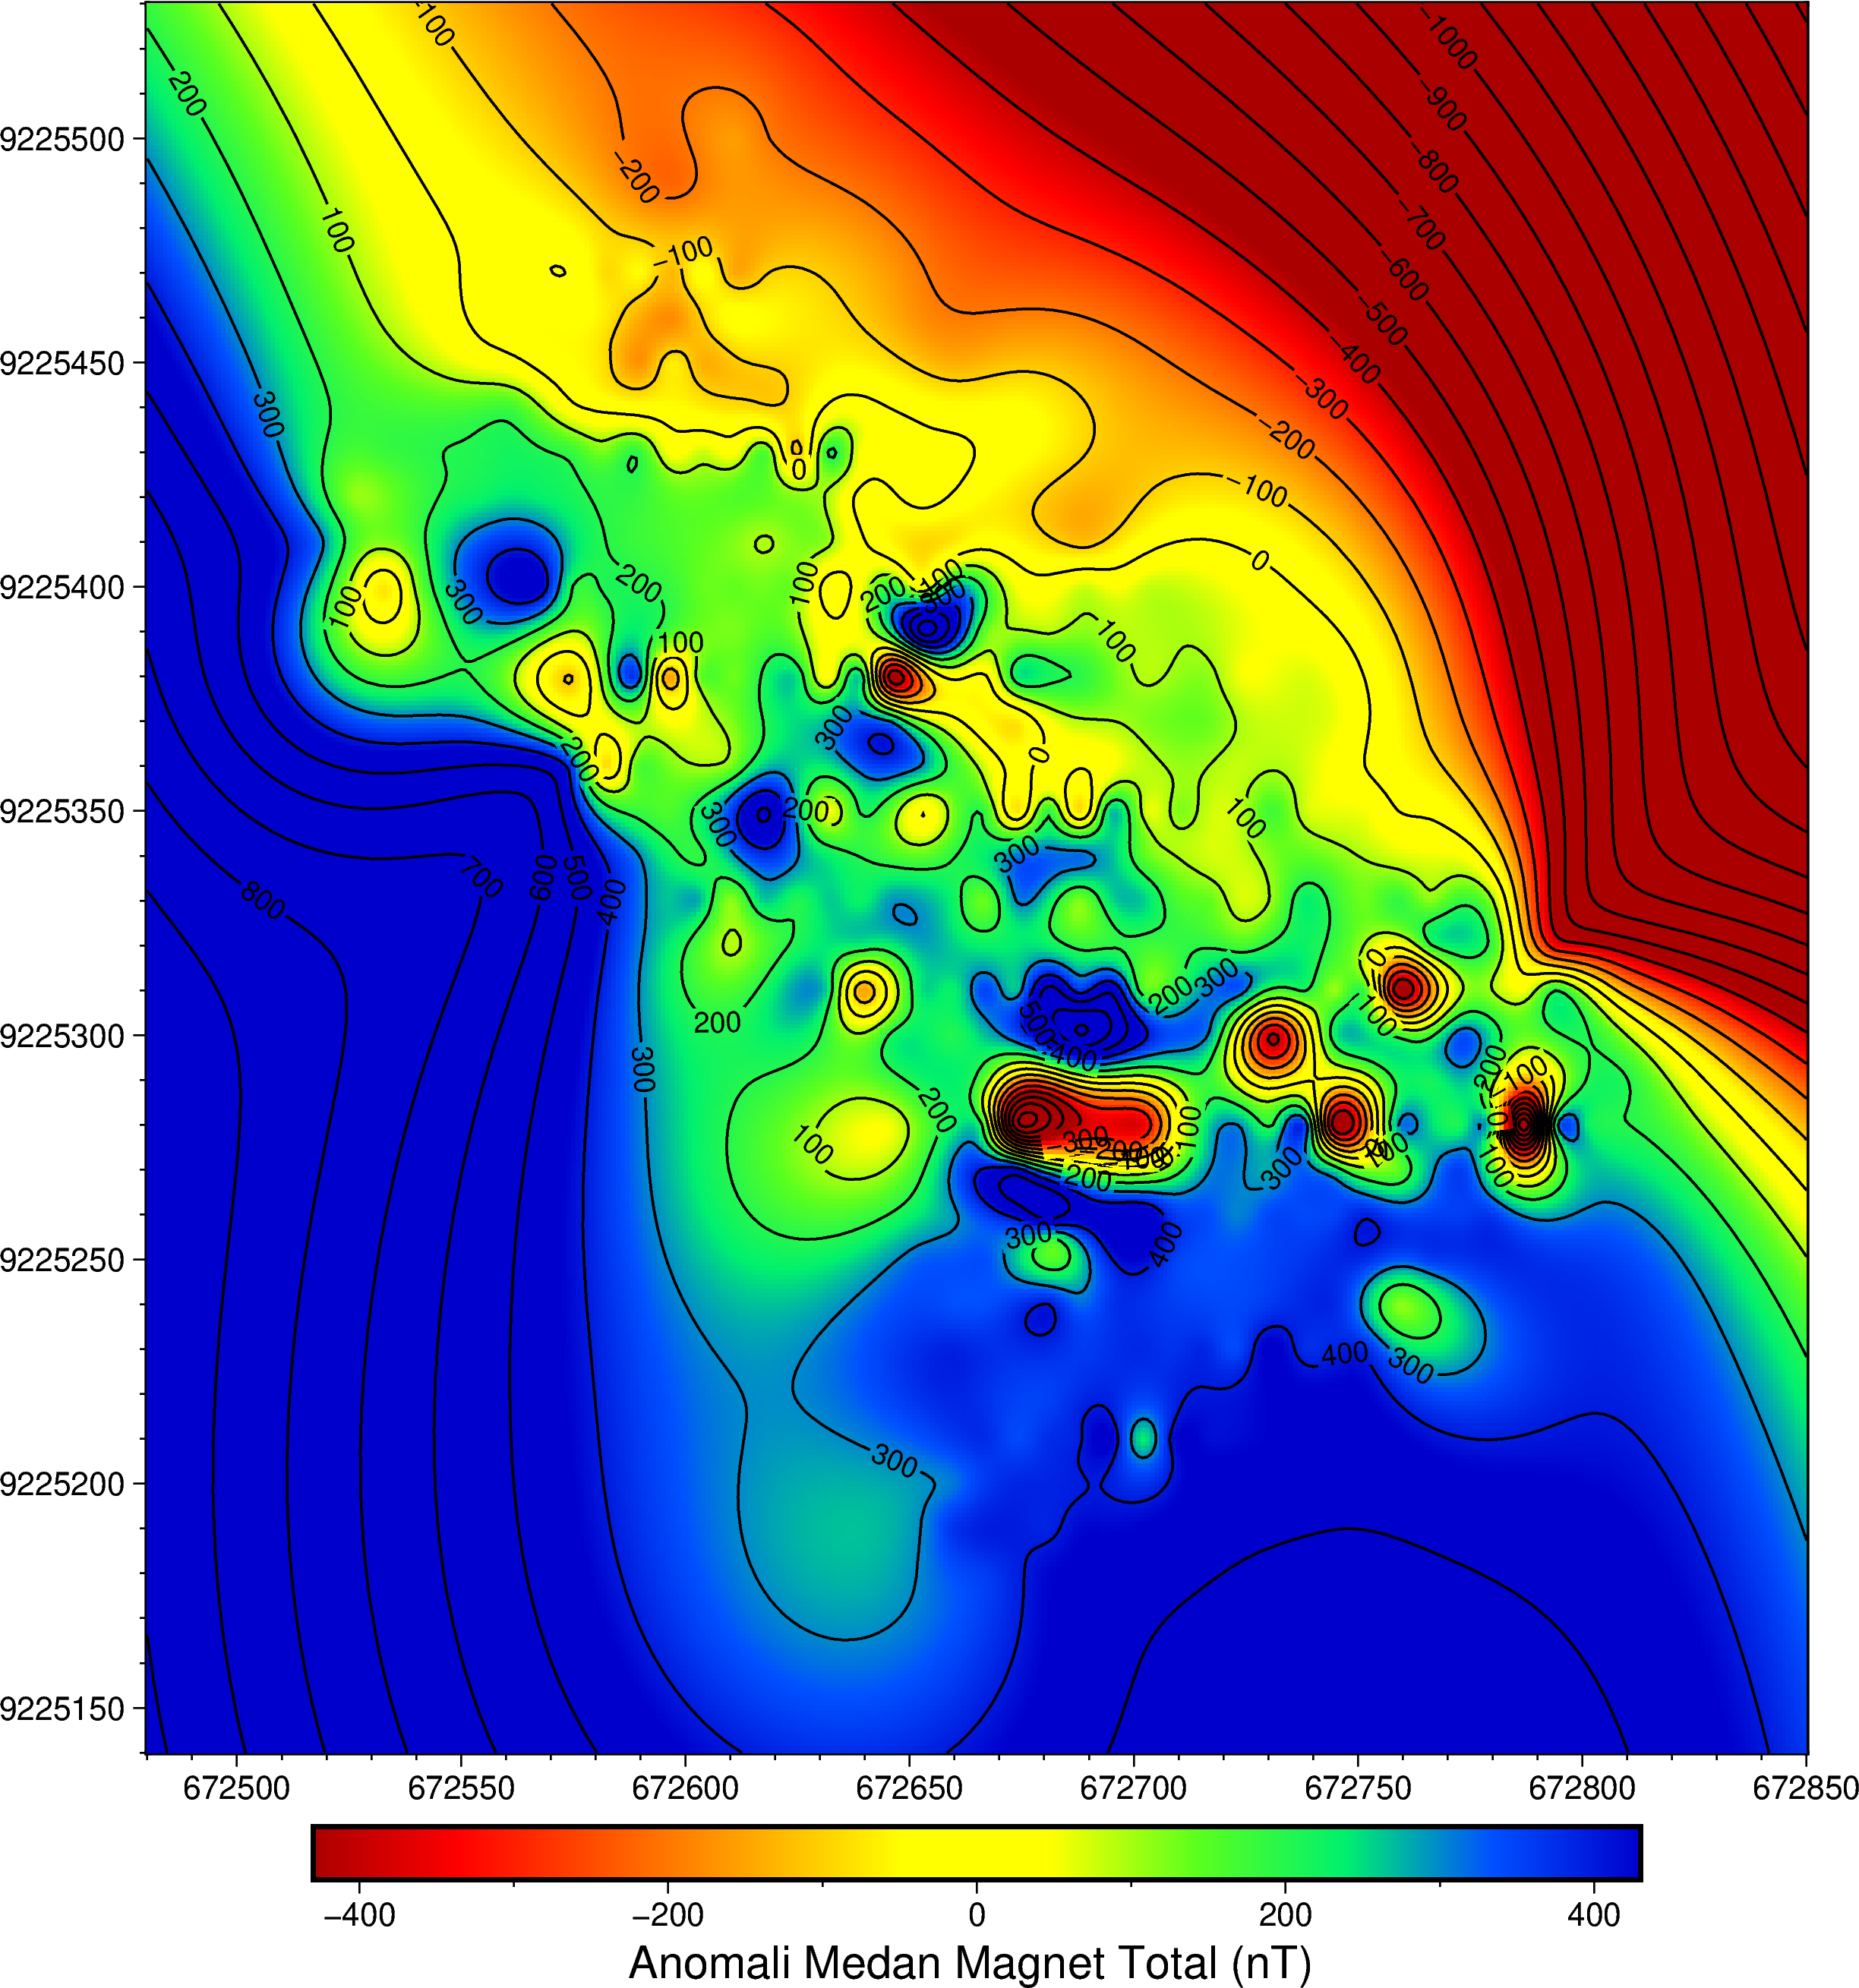

In [63]:
fig = pygmt.Figure()
fig.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=True)
scale = 0.25 * vd.maxabs(grid.anomali)
pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
fig.grdimage(grid=grid.anomali, cmap=True)
fig.grdcontour(grid=grid.anomali, interval=100, annotation=100)
fig.colorbar(frame=["x+lAnomali Medan Magnet Total (nT) "], cmap=True)
fig.show()

**3. Reduksi ke kutub**

Reduksi ke Kutub atau *Reduction to The Pole* (RTP) merupakan salah satu dari beberapa filter yang digunakan untuk membantu proses interpretasi. Filter RTP pada dasarnya mentransformasikan anomali magnetik disuatu lokasi ke kutub utara magnetik bumi. Sehingga, anomali medan magnet terletak tepat diatas tubuh benda penyebab anomali dan anomali magnet tidak lagi bersifat dipole/dua kutub tetapi menjadi bersifat monopole/satu kutub. Reduksi ke kutub dilakukan dengan dengan cara mengubah sudut inklinasi menjadi 90° dan deklinasi menjadi 0°.

Filter RTP mengasumsikan bahwa pada seluruh lokasi pengambilan data, nilai medan magnet bumi (terutama Inklinasi dan Deklinasi) memiliki nilai dan arah yang konstan. Asumsi ini dapat diterima apabila lokasi tersebut memiliki luas area yang relatif sempit. Namun asumsi ini tidak dapat digunakan apabila luas daerah pengambilan data sangat luas karena melibatkan nilai lintang dan bujur yang bervariasi, dimana harga medan magnet bumi berubah secara bertahap. Setelah dilakukan RTP, maka anomali yang muncul tidak lagi bersifat dipole, tetapi monopole sehingga lebih mudah untuk diidentifikasi.

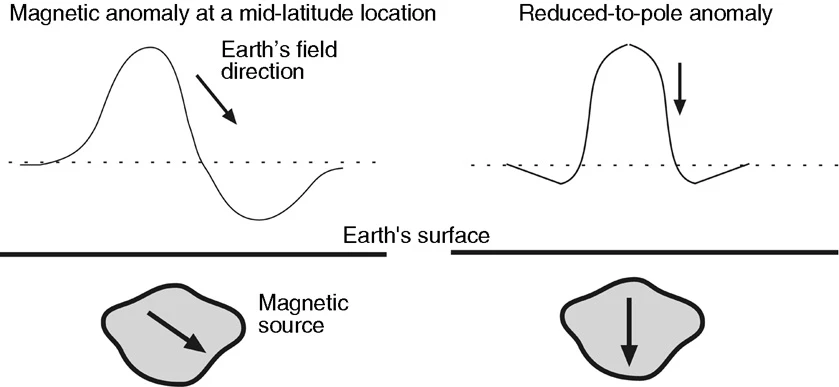

Gambar respon anomali magnetik di permukaan akibat sumber medan magnetik di bawah permukaan. (Kiri) Sebelum proses RTP, orientasi anomali masih searah dengan arah medan magnet bumi. (Kanan) Setelah proses RTP, orientasi anomali ke arah vertikal (Ravat, 2007).

Pada proses RTP, kita memerlukan rata-rata nilai deklinasi dan inklinasi di daerah survei kita. Pada waktu dan lokasi data survei yang kita gunakan, nilai inklinasi rata-ratanya adalah -30.92° sedangkan deklinasi rata-ratanya adalah 0.52°.

In [64]:
grid = grid.to_array() 
# Pad the grid to increase accuracy of the FFT filter
pad_width = {
    "easting": grid.easting.size // 3,
    "northing": grid.northing.size // 3,
}

magnetic_grid_no_height = grid.squeeze("variable") 
magnetic_grid = xrft.pad(magnetic_grid_no_height, pad_width) 

# Define the inclination and declination of the region by the time of the data
# acquisition (2022).
inclination, declination = -30.92, 0.52

# Apply a reduction to the pole over the magnetic anomaly grid. We will assume
# that the sources share the same inclination and declination as the
# geomagnetic field.
rtp_grid = hm.reduction_to_pole(
    magnetic_grid, inclination=inclination, declination=declination
)

# Unpad the reduced to the pole grid
rtp_grid = xrft.unpad(rtp_grid, pad_width)

print(rtp_grid) 

<xarray.DataArray (northing: 391, easting: 371)>
array([[ 3996.14535257,  3930.65277338,  3943.56543591, ...,
          -15.67173707,   -19.90718288,   -46.71134523],
       [ 3507.61794865,  3437.86998858,  3427.28040684, ...,
         -217.3066896 ,  -210.06085656,  -231.55540212],
       [ 3589.76725349,  3486.80860022,  3470.15812484, ...,
         -207.67610305,  -198.13063695,  -207.67090774],
       ...,
       [  516.52816851,   365.25238708,   327.6675226 , ...,
          570.56022614,   100.73272049, -1196.84993948],
       [  460.78709699,   322.7285253 ,   307.16057958, ...,
          763.82120507,   512.76846825,  -758.18551295],
       [  261.09162668,   198.02509013,   197.81324254, ...,
         1895.16483654,  1797.86305885,  1124.67830379]])
Coordinates:
  * northing  (northing) float64 9.225e+06 9.225e+06 ... 9.226e+06 9.226e+06
  * easting   (easting) float64 6.725e+05 6.725e+05 ... 6.728e+05 6.728e+05


/usr/local/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


Kita tampilkan peta kontur anomali RTP dan kontur anomali medan magnet totalnya.

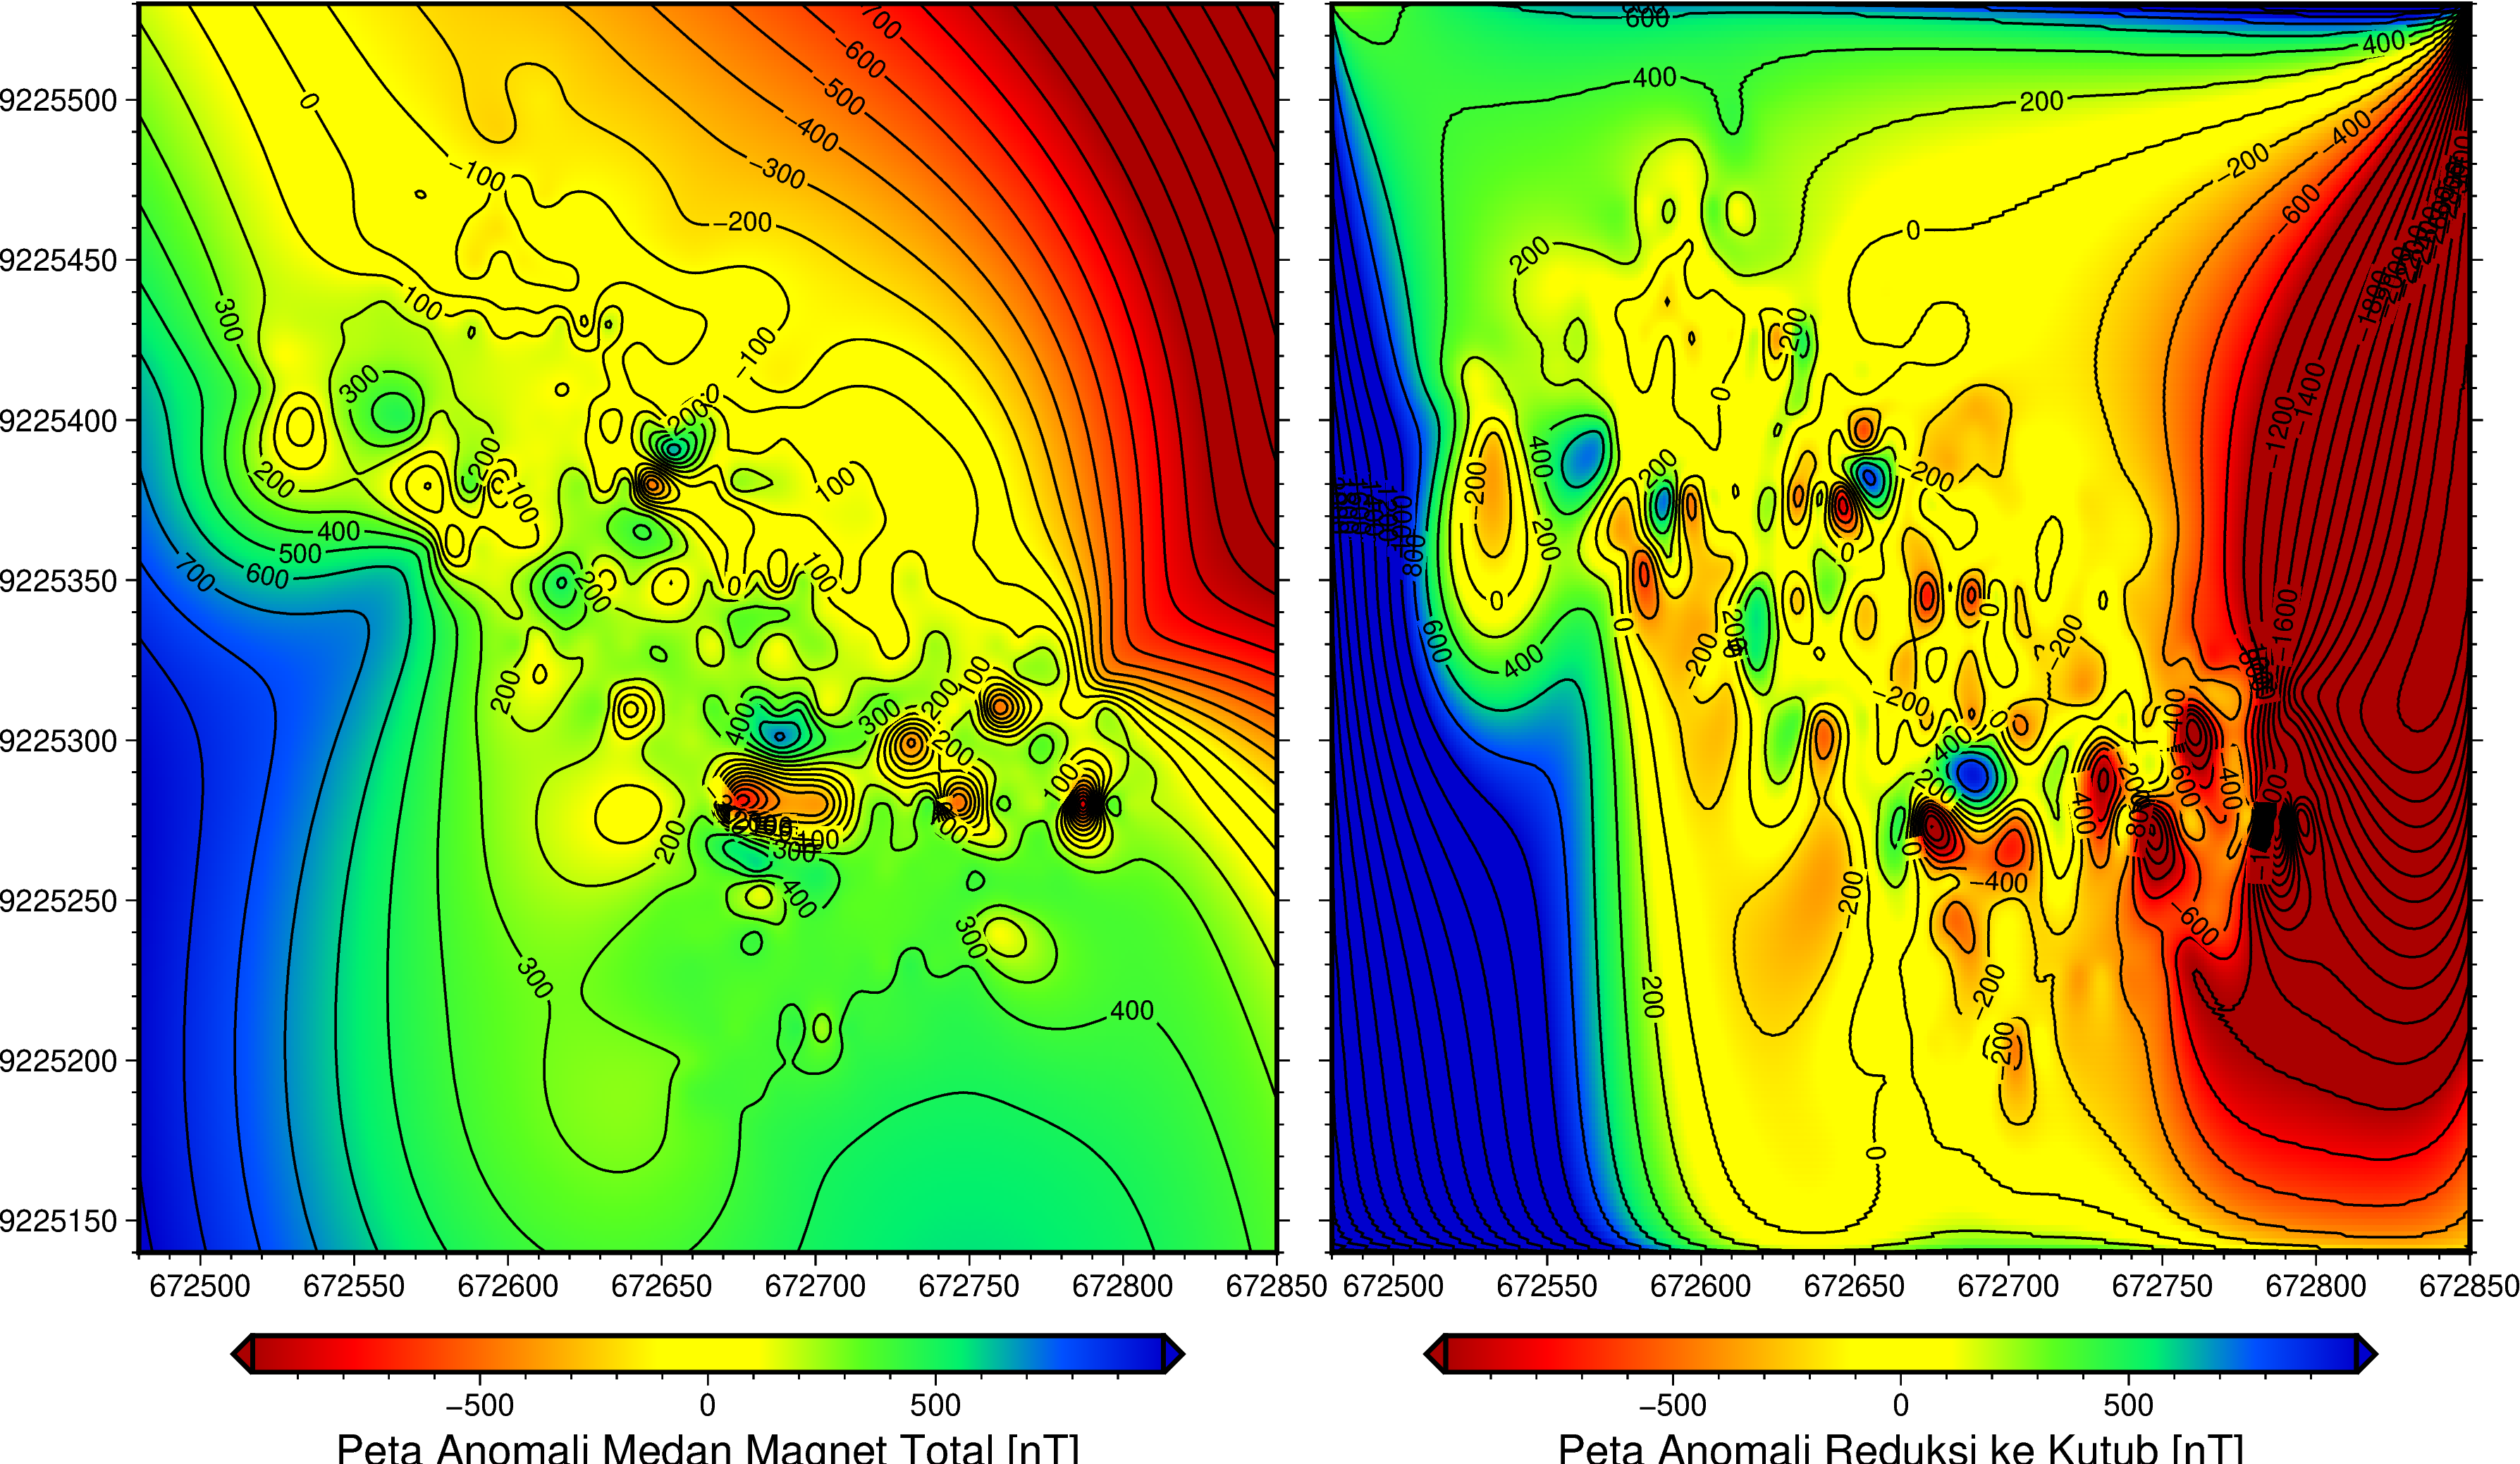

In [67]:
# Plot original magnetic anomaly and the reduced to the pole
fig = pygmt.Figure()
with fig.subplot(nrows=1, ncols=2, figsize=("28c", "15c"), sharey=("l")):
    # Make colormap for both plots (saturate it a little bit)
    scale = 0.25 * vd.maxabs(magnetic_grid, rtp_grid)
    pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
    with fig.set_panel(panel=0):
        # Plot magnetic anomaly grid
        fig.grdimage(
            region=[672480, 672850, 9225140, 9225530], 
            grid=magnetic_grid,
            projection="X?",
            cmap=True,
        )
        fig.grdcontour(
            grid=magnetic_grid, interval=100, annotation=100
        )
        # Add colorbar
        fig.colorbar(
            frame='af+l"Peta Anomali Medan Magnet Total [nT]"',
            position="JBC+h+o0/1c+e",
        )
    with fig.set_panel(panel=1):
        # Plot upward reduced to the pole grid
        fig.grdimage(
             region=[672480, 672850, 9225140, 9225530], 
             grid=rtp_grid,
             projection="X?",
             cmap=True)
        fig.grdcontour(
            grid=rtp_grid, interval=200, annotation=200
        )
        # Add colorbar
        fig.colorbar(
            frame='af+l"Peta Anomali Reduksi ke Kutub [nT]"',
            position="JBC+h+o0/1c+e",
        )
fig.show()

**4. Kontinuasi ke atas**

Kontinuasi ke atas atau *Upward Continuation* merupakan suatu proses untuk mengubah data pengukuran medan potensial yang telah dikoreksi dalam satu permukaan ke permukaan yang lebih tinggi dari permukaan ketika melakukan pengukuran hingga beberapa meter. Untuk penentuan ketinggiannya tergantung pada keinginan dalam melihat target yang prospek sehingga dapat terlihat lebih jelas tanpa tergabung dengan noise–noise yang ada atau pengaruh dari benda–benda dekat permukaan yang bersifat magnet sehingga membuat data agak sulit untuk dilihat prospeknya.

Pada pengolahan data geomagnetik, proses ini dapat berfungsi sebagai filter tapis rendah, yaitu untuk menghilangkan atau mereduksi efek magnetik lokal yang berasal dari berbagai sumber benda magnetik yang tersebar di permukaan topografi yang tidak terkait dengan survei. Proses pengangkatan tidak boleh terlalu tinggi, karena hal ini dapat mereduksi anomali magnetik lokal yang bersumber dari benda magnetik atau struktur geologi yang menjadi target survei magnetik ini. Kontinuasi ke atas dapat kita gunakan untuk membuat anomali regional.

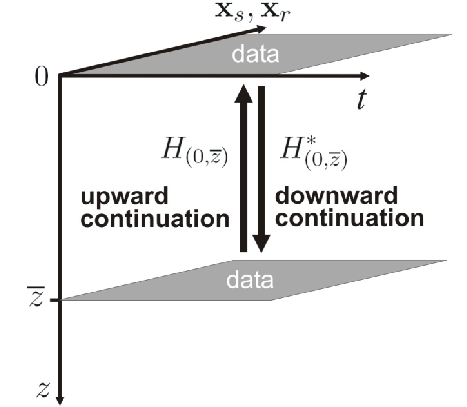

Gambar skema upward dan downward continuation dari suatu data di elevasi tertentu ke elevasi yang lain.

Pada data ini, data kita kontinuasi ke atas pada ketinggian 50 meter.

In [68]:

# Pad the grid to increase accuracy of the FFT filter
pad_width = {
    "easting": grid.easting.size // 3,
    "northing": grid.northing.size // 3,
}

magnetic_grid_no_height = grid.squeeze("variable")
magnetic_grid = xrft.pad(magnetic_grid_no_height, pad_width)

# Upward continue the magnetic grid, from 500 m to 1000 m
# (a height displacement of 500m)
upward_continued = hm.upward_continuation(magnetic_grid, height_displacement=50)

# Unpad the reduced to the pole grid
upward_continued = xrft.unpad(upward_continued, pad_width)

/usr/local/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


Kita tampilkan peta kontur medan magnet total dan peta hasil proses kontinuasi ke atas pada ketinggian 50 meter.

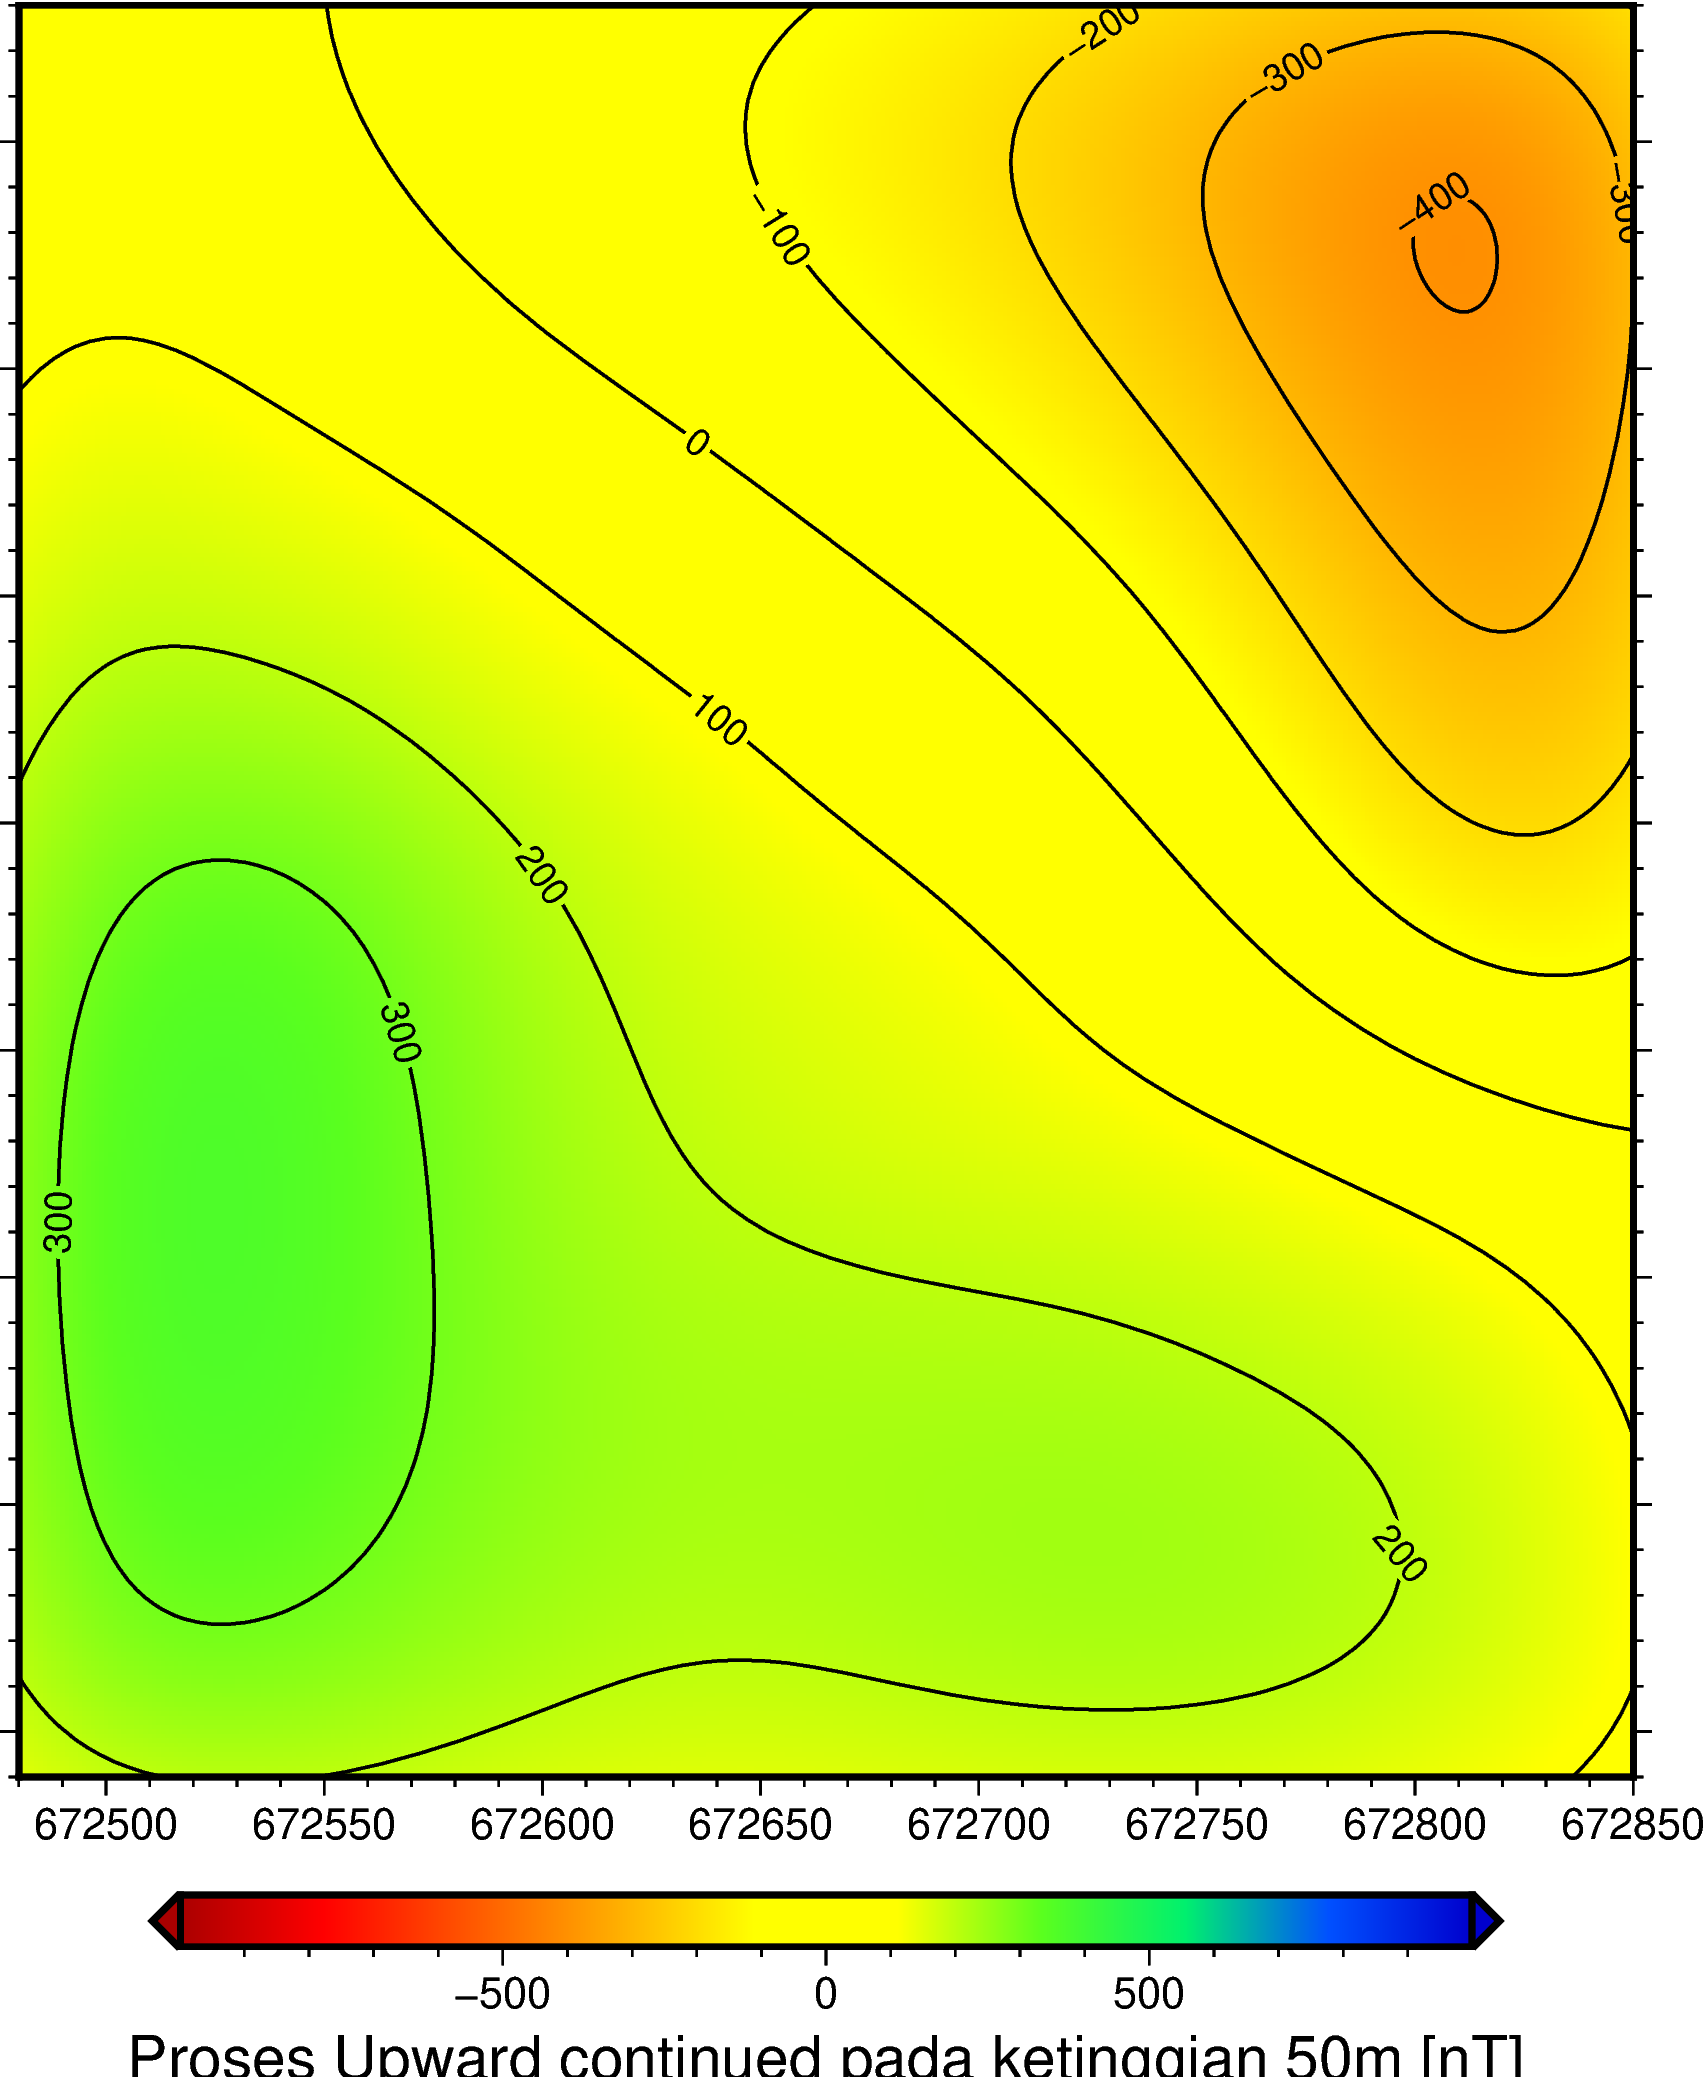

In [70]:

# Plot original magnetic anomaly and the reduced to the pole
fig = pygmt.Figure()
with fig.subplot(nrows=1, ncols=2, figsize=("28c", "15c"), sharey=("l")):
    # Make colormap for both plots (saturate it a little bit)
    scale = 0.25 * vd.maxabs(rtp_grid)
    pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
    with fig.set_panel(panel=1):
        # Plot upward continued
        fig.grdimage(
             region=[672480, 672850, 9225140, 9225530],
             grid=upward_continued,
             projection="X?",
             cmap=True)
        fig.grdcontour(
            grid=upward_continued, interval=100, annotation=100
        )
        # Add colorbar
        fig.colorbar(
            frame='af+l"Proses Upward continued pada ketinggian 50m [nT]"',
            position="JBC+h+o0/1c+e",
        )
fig.show()

**5. Pemisahan Anomali Regional dan Residual**

Nilai Anomali yang dihasilkan dari proses koreksi pada pengolahan sebelumnya merupakan gabungan dari anomali regional dan anomali residual. Tahap pemisahan kedua anomali tersebut sangat penting dilakukan dalam penafsiran data magnet bumi. Terdapat beberapa teknik yang dapat digunakan dalam pemisahan anomali magnet bumi, seperti Upward Continuation, Moving Average, Trend Surface Analysis, Butterworth Filter, dan metode yang lain. Penentuan anomali regional sangat penting karena dari anomali regional ini nantinya akan didapat nilai anomali residualnya. 

In [71]:
residual = rtp_grid - upward_continued

Kita tampilkan peta kontur anomali medan magnet total dan peta anomali residualnya.

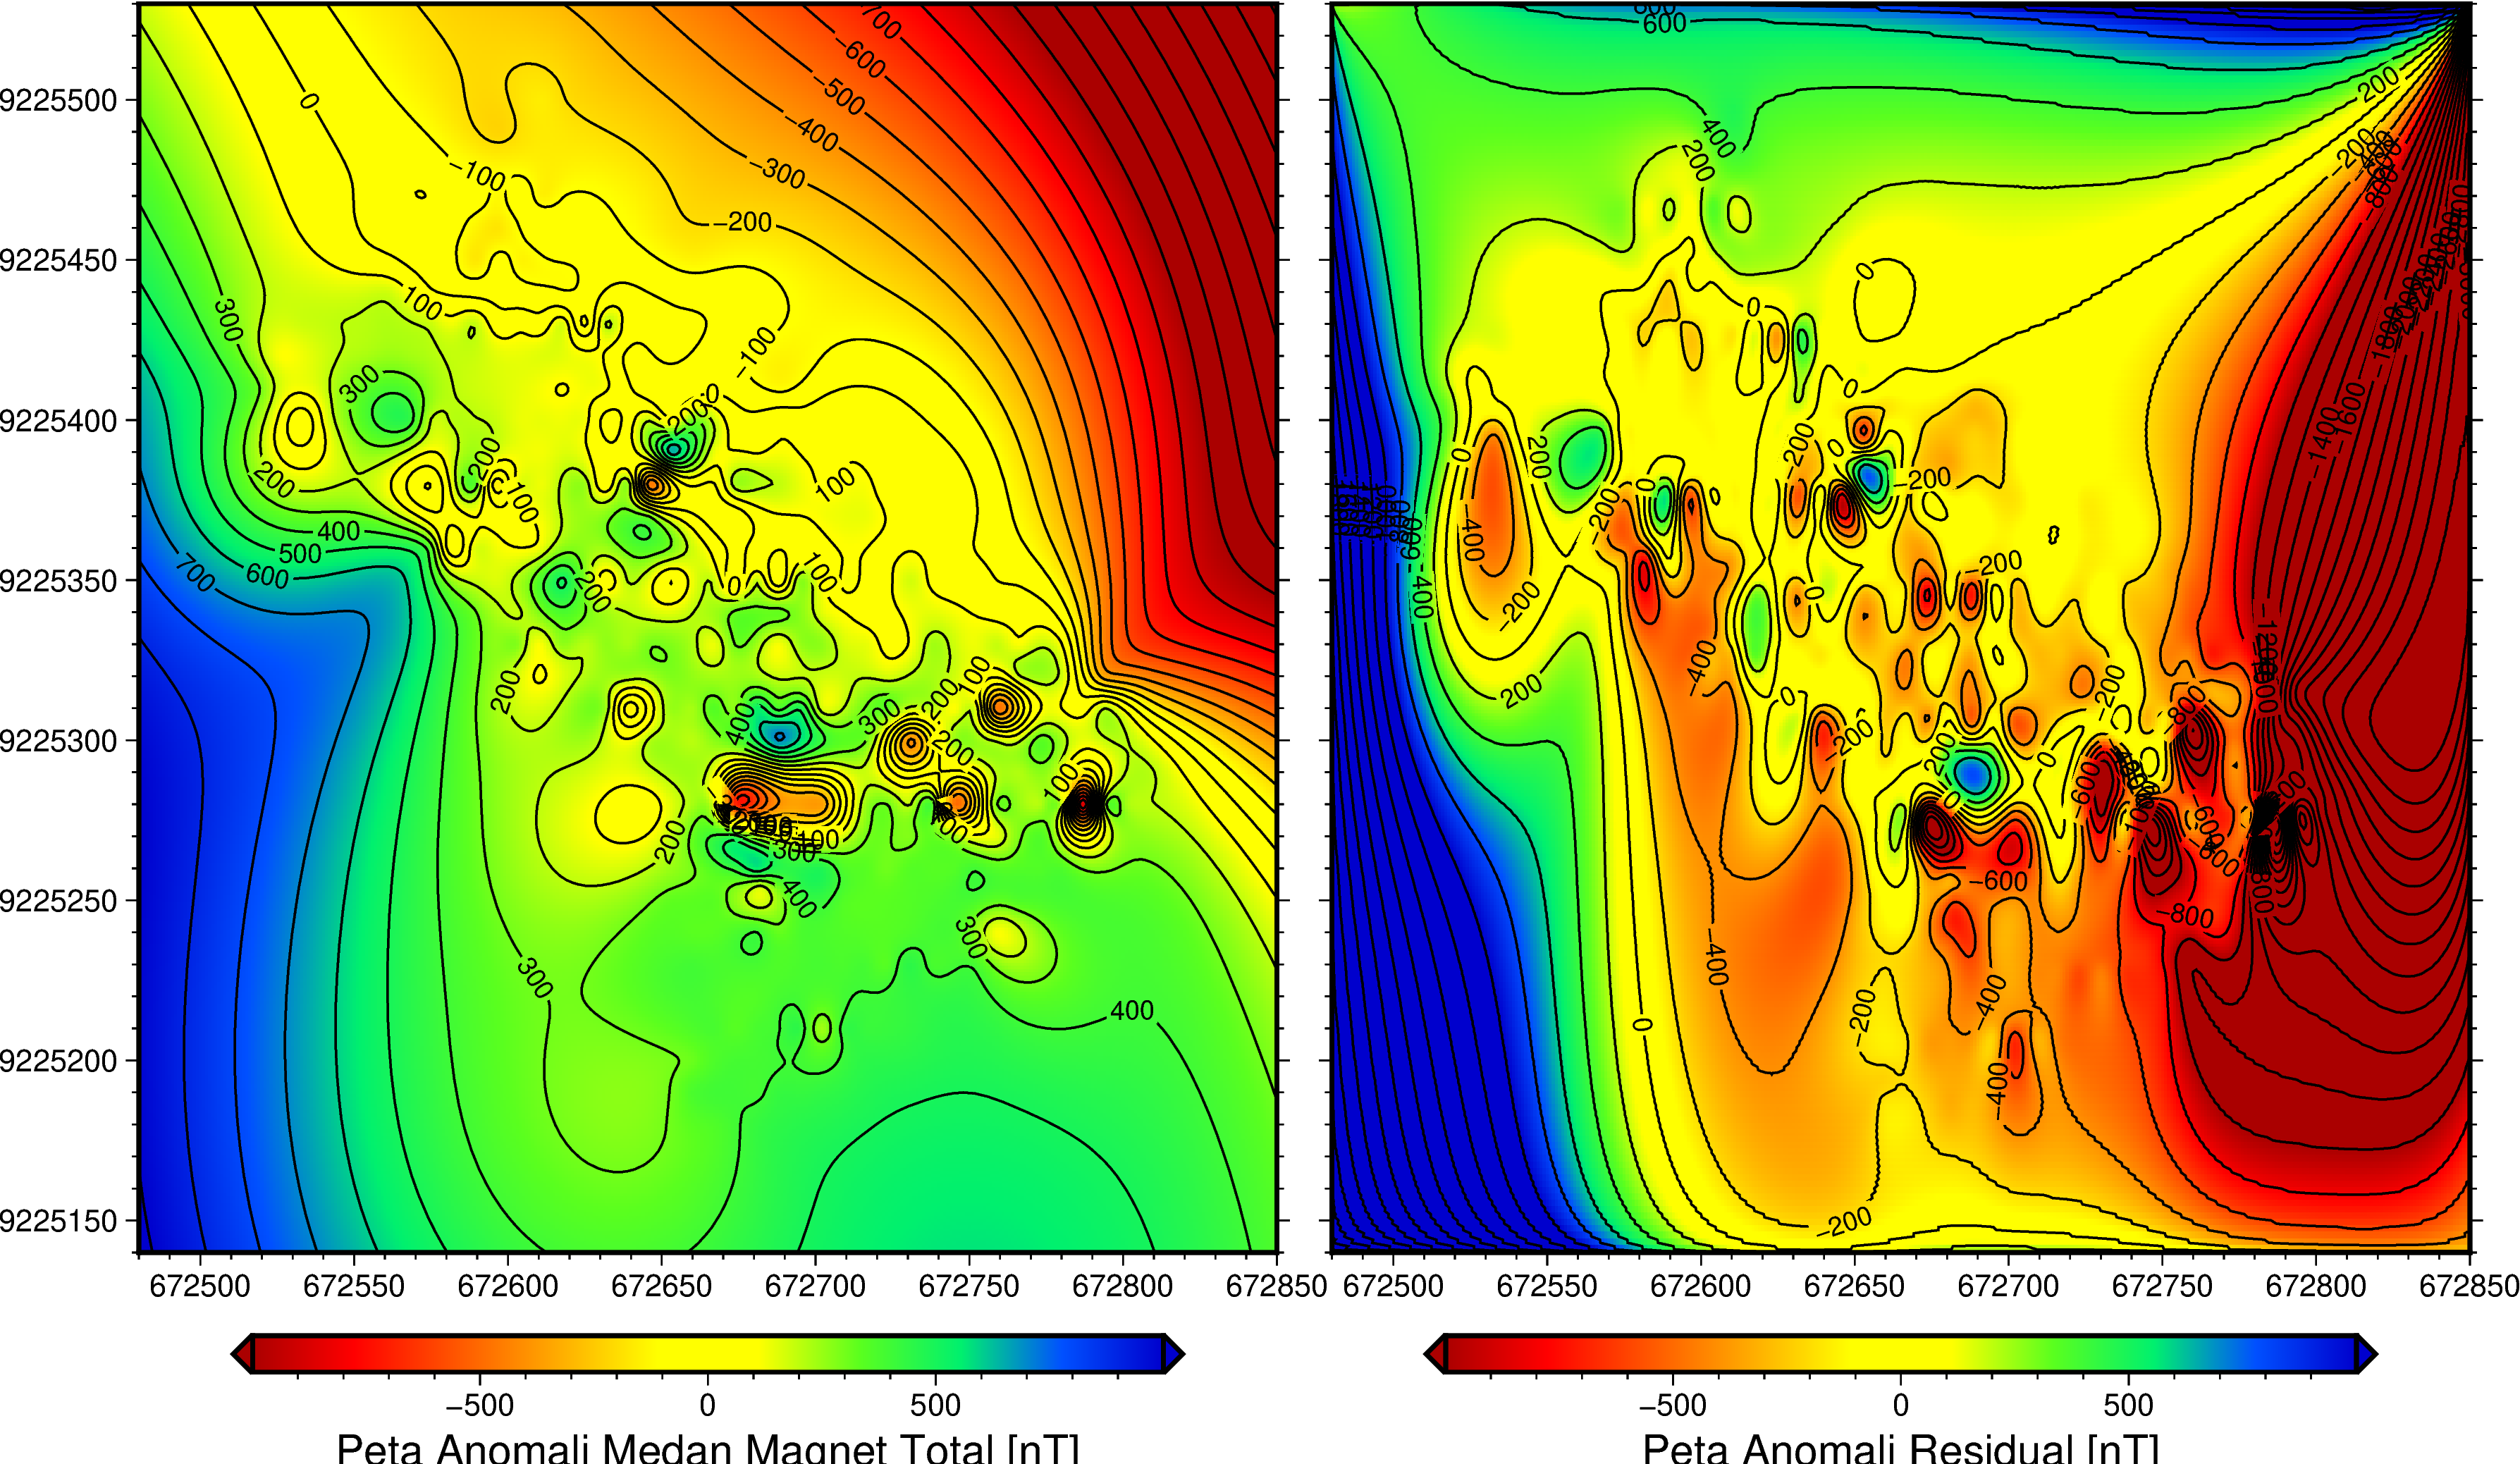

In [73]:

# Plot original magnetic anomaly and the residual anomaly
fig = pygmt.Figure()
with fig.subplot(nrows=1, ncols=2, figsize=("28c", "15c"), sharey=("l")):
    # Make colormap for both plots (saturate it a little bit)
    scale = 0.25 * vd.maxabs(magnetic_grid, rtp_grid)
    pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
    with fig.set_panel(panel=0):
        # Plot magnetic anomaly grid
        fig.grdimage(
            region=[672480, 672850, 9225140, 9225530],
            grid=magnetic_grid,
            projection="X?",
            cmap=True,
        )
        fig.grdcontour(
            grid=magnetic_grid, interval=100, annotation=100
        )
        # Add colorbar
        fig.colorbar(
            frame='af+l"Peta Anomali Medan Magnet Total [nT]"',
            position="JBC+h+o0/1c+e",
        )
    with fig.set_panel(panel=1):
        # Plot residual anomaly
        fig.grdimage(
             region=[672480, 672850, 9225140, 9225530],
             grid=residual,
             projection="X?",
             cmap=True)
        fig.grdcontour(
            grid=residual, interval=200, annotation=200
        )
        # Add colorbar
        fig.colorbar(
            frame='af+l"Peta Anomali Residual [nT]"',
            position="JBC+h+o0/1c+e",
        )
fig.show()

Agar peta terlihat lebih baik, area di luar titik pengukuran kita hilangkan atau di clip. Kita masukkan titik-titik batas area pengukuran.

In [74]:
CRS = pyproj.crs.CRS('+proj=utm +zone=48 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [672613.31, 9225522.86],
            [672837.03, 9225294.03],
            [672670.00, 9225150.50],
            [672633.74, 9225187.78],
            [672629.14, 9225248.06],
            [672492.76, 9225406.40],
            [672613.31, 9225522.86],
        ]], 
    }
]

# Clipping data anomali total
magnetic_grid.rio.set_spatial_dims("easting", "northing", inplace=True)
magnetic_grid.rio.write_crs(CRS, inplace=True)
clipped_total = magnetic_grid.rio.clip(geometries)
clipped_total.max(skipna=True)

# Clipping data RTP
rtp_grid.rio.set_spatial_dims("easting", "northing", inplace=True)
rtp_grid.rio.write_crs(CRS, inplace=True)
clipped_rtp = rtp_grid.rio.clip(geometries)
clipped_rtp.max(skipna=True)

# Clipping data anomali regional
upward_continued.rio.set_spatial_dims("easting", "northing", inplace=True)
upward_continued.rio.write_crs(CRS, inplace=True)
clipped_reg = upward_continued.rio.clip(geometries)
clipped_reg.max(skipna=True)

# Clipping data anomali residual
residual.rio.set_spatial_dims("easting", "northing", inplace=True)
residual.rio.write_crs(CRS, inplace=True)
clipped_res = residual.rio.clip(geometries)
clipped_res.max(skipna=True)

<xarray.DataArray ()>
array(982.18210746)
Coordinates:
    spatial_ref  int64 0

Kita tampilkan peta kontur anomali medan magnet total, hasil reduksi ke kutub, anomali regional, serta anomali residualnya.

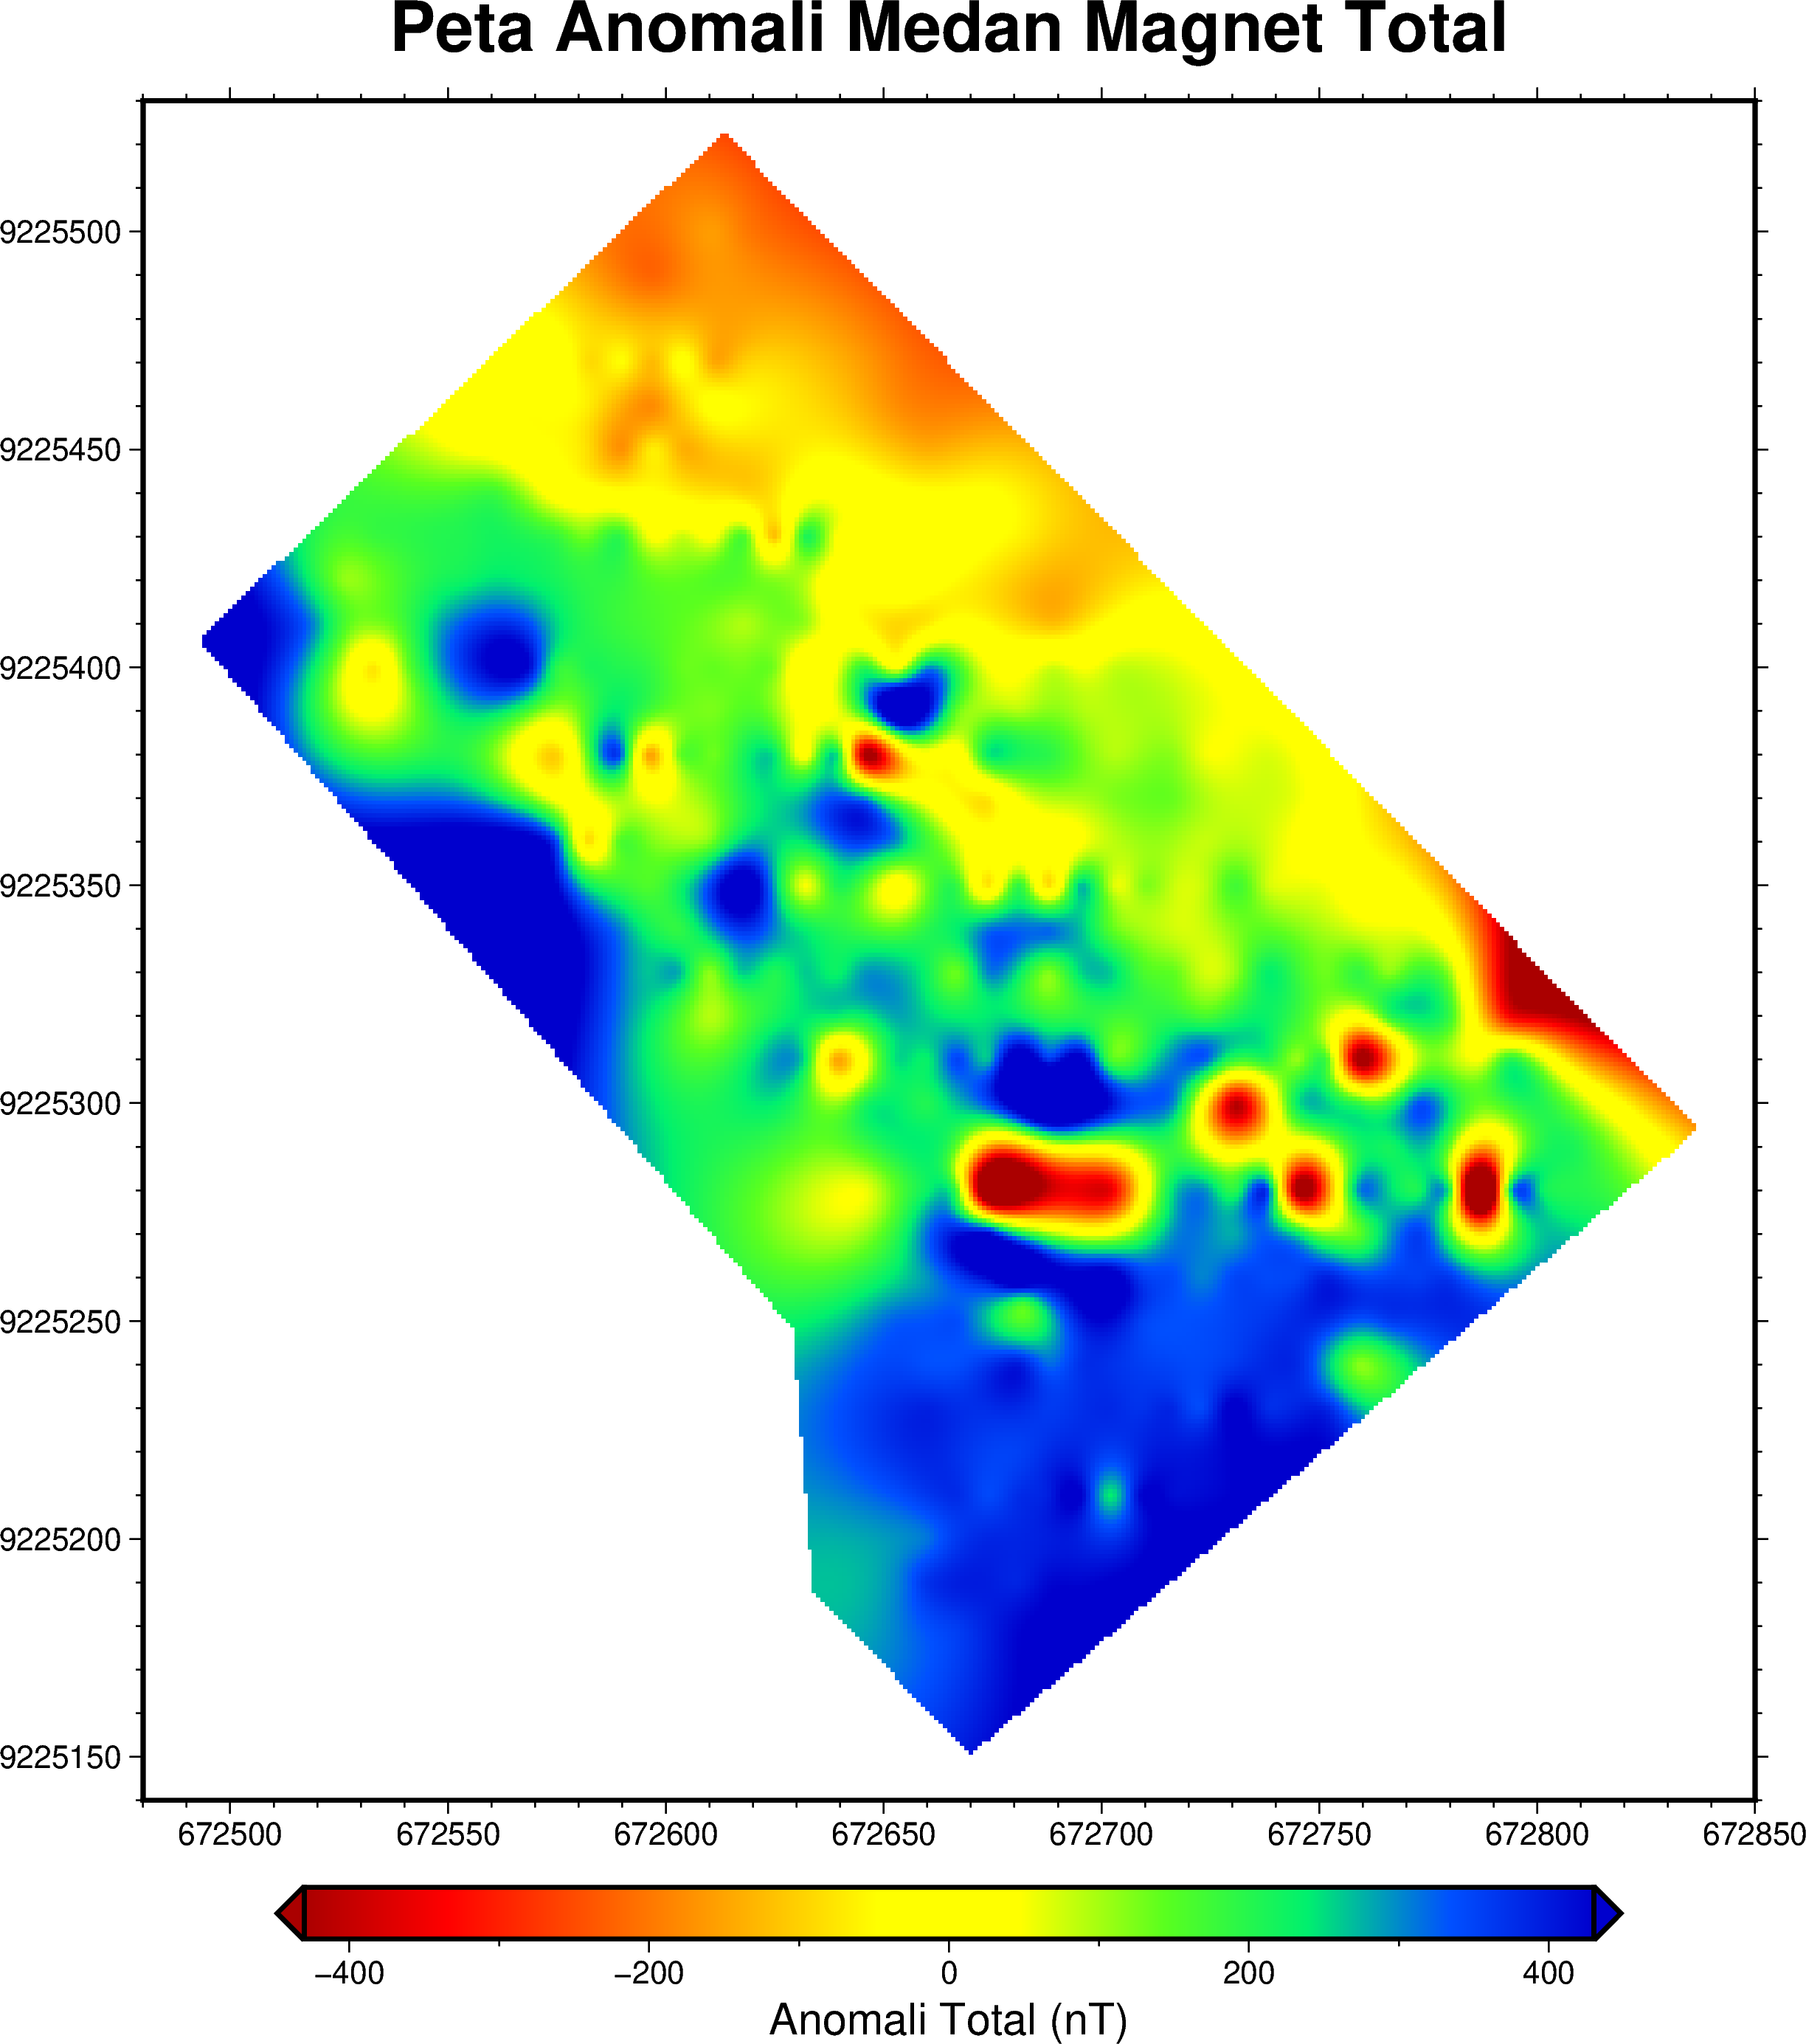

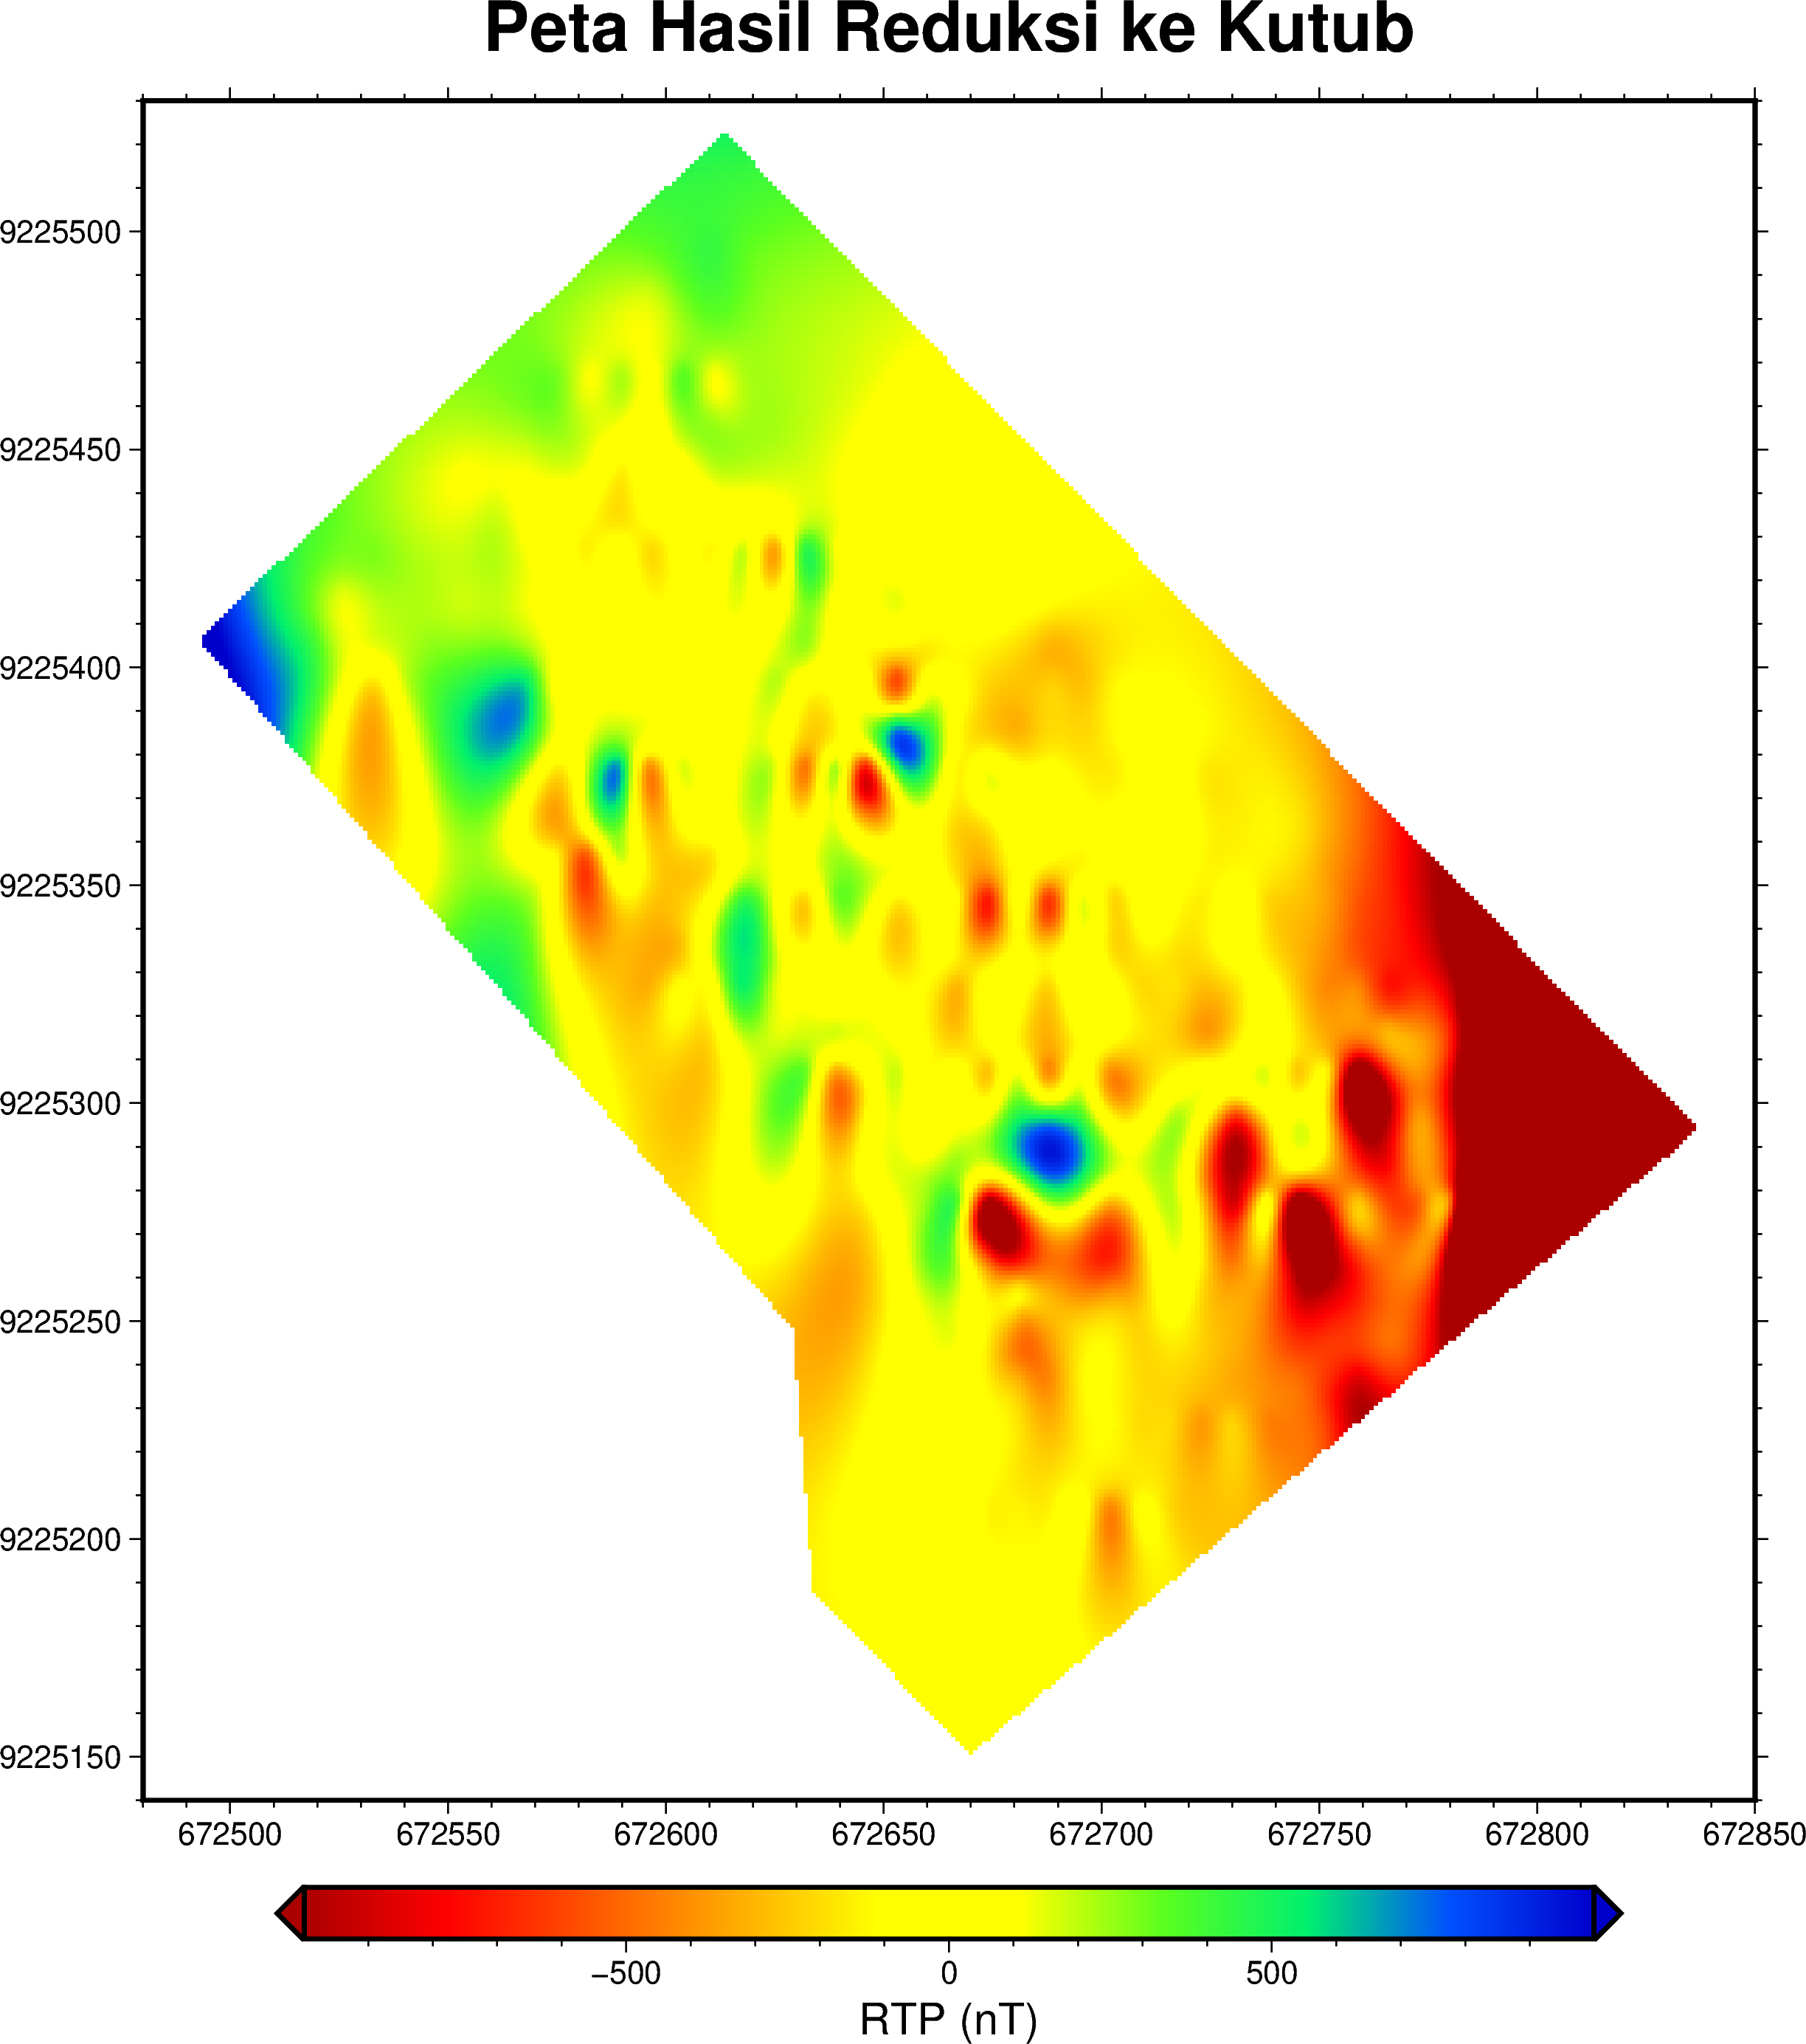

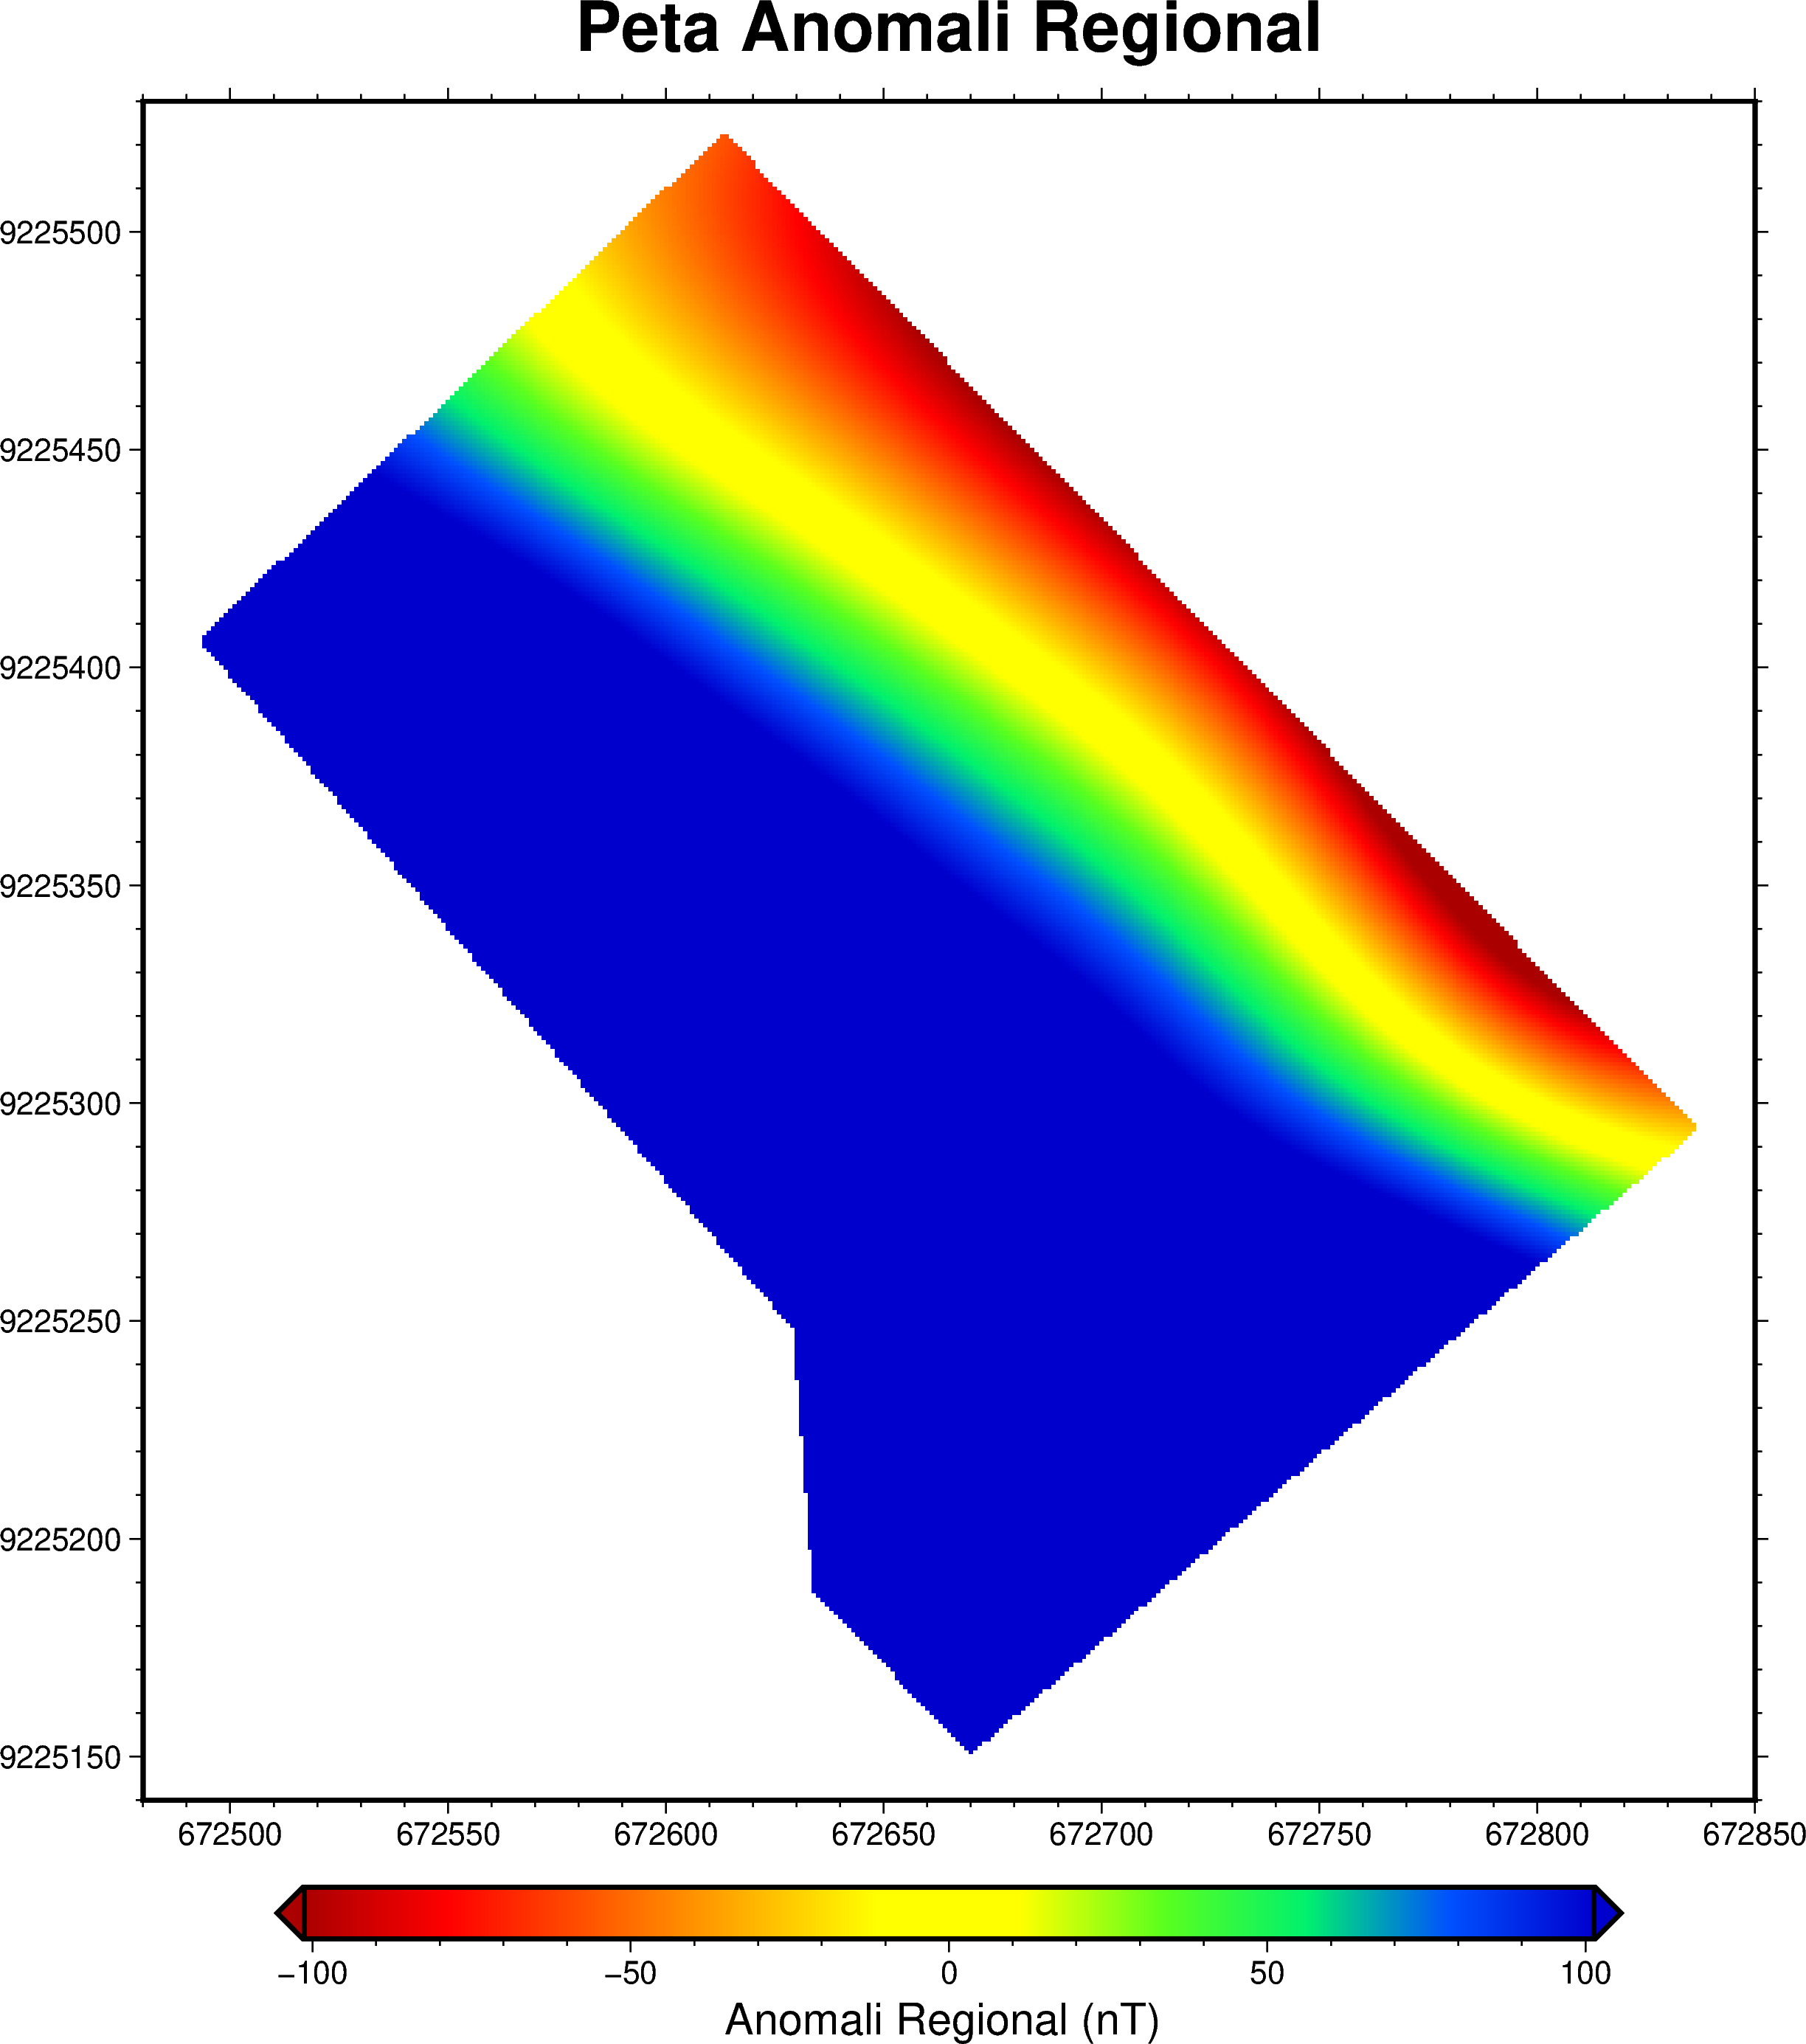

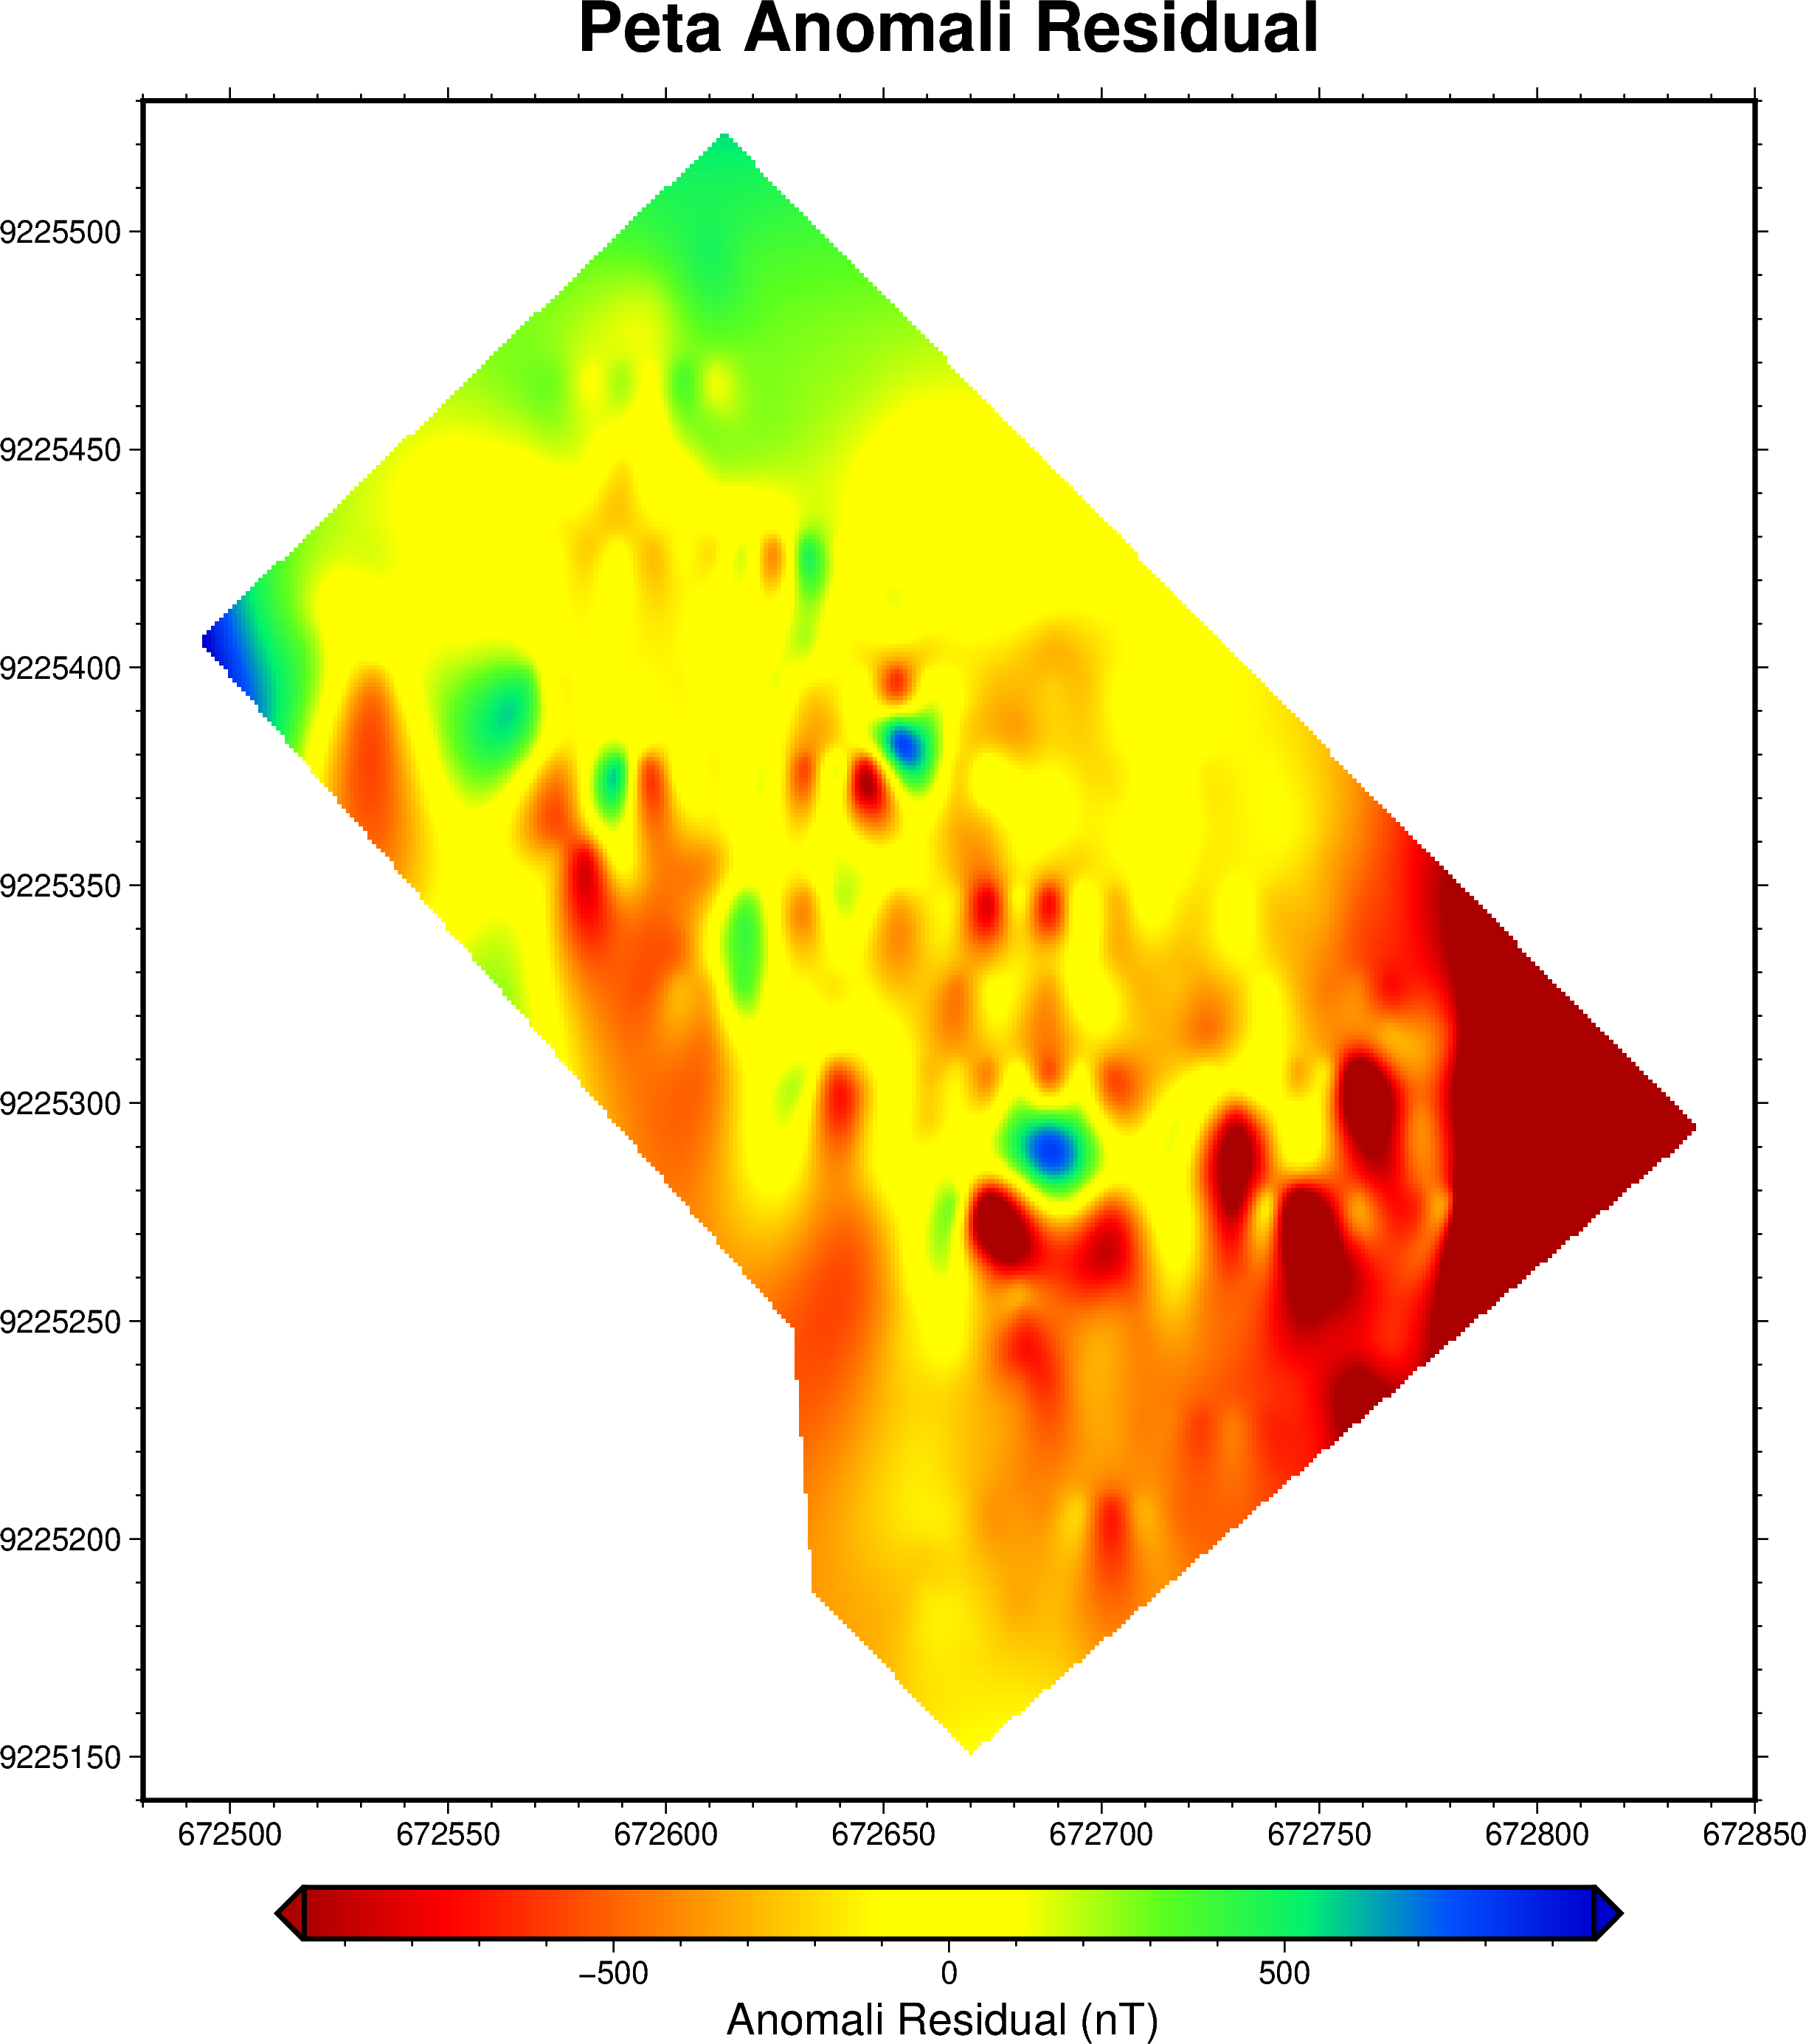

In [77]:
# Menampilkan Peta Anomali Medan Magnet Total
fig1 = pygmt.Figure()
fig1.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=["WSen+tPeta Anomali Medan Magnet Total", "af"])
scale = 0.25 * vd.maxabs(magnetic_grid)
pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
fig1.grdimage(grid=clipped_total, cmap=True, nan_transparent=True)
fig1.colorbar(frame=["x+lAnomali Total (nT)"], cmap=True, position="JBC+h+o0/1c+e")
fig1.show()
print(' ')

# Menampilkan Peta Hasil Reduksi ke Kutub
fig2 = pygmt.Figure()
fig2.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=["WSen+tPeta Hasil Reduksi ke Kutub", "af"])
scale = 0.25 * vd.maxabs(rtp_grid)
pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
fig2.grdimage(grid=clipped_rtp, cmap=True, nan_transparent=True)
fig2.colorbar(frame=["x+lRTP (nT)"], cmap=True, position="JBC+h+o0/1c+e")
fig2.show()
print(' ')

# Menampilkan Peta Anomali Regional
fig3 = pygmt.Figure()
fig3.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=["WSen+tPeta Anomali Regional", "af"])
scale = 0.25 * vd.maxabs(upward_continued)
pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
fig3.grdimage(grid=clipped_reg, cmap=True, nan_transparent=True)
fig3.colorbar(frame=["x+lAnomali Regional (nT) "], cmap=True, position="JBC+h+o0/1c+e")
fig3.show()
print(' ')

# Menampilkan Peta Anomali Residual
fig4 = pygmt.Figure()
fig4.basemap(projection='x1:2000', region=[672480, 672850, 9225140, 9225530], frame=["WSen+tPeta Anomali Residual", "af"])
scale = 0.25 * vd.maxabs(residual)
pygmt.makecpt(cmap="seis+h", series=[-scale, scale], background=True)
fig4.grdimage(grid=clipped_res, cmap=True, nan_transparent=True)
fig4.colorbar(frame=["x+lAnomali Residual (nT) "], cmap=True, position="JBC+h+o0/1c+e")
fig4.show()

**Referensi**



> Arifin, Y. I. (2019). Kemagnetan Batuan (Anisotropi Batuan Beku). UNG Press Gorontalo.

> Constable, C.G., and Constable, S.C., (2004). Satellite magnetic field measurements: applications in studying the deep earth. In Sparks, R.S.J., and Hawkesworth, C.J., (eds.), The State of the Planet: Frontiers and Challenges in Geophysics. Washington, DC: American Geophysical Union, doi: 10.1029/150GM13, pp. 147–160.

> Fenoglio, M. A., Johnston, M.J.S., dan Byerlee, J.D. (1995). Magnetic and Electric Fields Associated with Changes in High Pore Pressure in Fault Zone-Application to the Loma Prieta ULF Emissions, J. Geophys. Res. 100, pp 12951-12958.

> Freund, F.T. (2007). Pre-Earthquake Signals-Part I: Deviatoric Stresses Turn Rocks into A Source of Electric Currents, Natural Hazards Earth System Science, pp 535-541.

> Hattori, K. (2004). ULF geomagnetic changes associated with large earthquakes, Terr. Atmos. OceanSci., vol. 15,no. 3, pp. 329–360.

> Ismaguilov, V. S., Kopytenko, Yu. A., Hattori, K., and Hayakawa, M. (2003). Variations of phase velocity and gradient values of ULF geomagnetic disturbances connected with the Izu strong earthquakes, Nat. Hazards Earth Syst. Sci., 3, 211–215, https://doi.org/10.5194/nhess-3-211-2003.

> Kolhatkar, A., Jamison, A., Litvinov, D., Willson, R., & Lee, T. (2013). Tuning the Magnetic Properties of Nanoparticles. International Journal of Molecular Sciences, 14(8), 15977–16009. MDPI AG. Retrieved from http://dx.doi.org/10.3390/ijms14081597

> Kopytenko, Y. & Ismagilov, V. & Hayakawa, Masashi & Smirnova, N. & Troyan, V. & Peterson, T.. (2001). Investigation of the ULF electromagnetic phenomena related to earthquakes: Contemporary achievements and the perspectives. Annali di Geofisica. 44. 325-334. 

> Merzer, M., dan Klemperer, S.L. (1997). Modelling Low-Frequency Magnetik Field Prekursors to the Loma Prieta Earthquake with A Prekursory Increase in Fault Zone Conductivity, Pure Applied Geophysics, Vol. 150, pp 217-248.

> Molchanov, O.A., dan Hayakawa, M. (1998). On the Generation Mechanism of ULF Seismogenic Emissions, Physics Earth Planet International, Vol. 105, pp 210-210.

> Nettleton, L. L. (1962). Gravity and Magnetics for Geologists and Seismologists. AAPG Bulletin, Vol. 46, No. 10, pp. 1815-1838

> Ravat, D. (2007). Reduction to Pole. In: Gubbins, D., Herrero-Bervera, E. (eds) Encyclopedia of Geomagnetism and Paleomagnetism. Springer, Dordrecht. https://doi.org/10.1007/978-1-4020-4423-6_275

> Santosa, Bagus J., Mashuri, Sutrisno, Wahyu T., Wafi, A., Salim, R., dan Armi, R. (2012). Interpretasi Metode Magnetik untuk Penentuan Struktur Bawah Permukaan di Sekitar Gunung Kelud Kabupaten Kediri. Jurnal Penelitian Fisika dan Aplikasinya (JPFA), Vol. 2 No. 1, Juni 2012. ISSN: 2087-9946.

> Uieda, L., V. C. Oliveira Jr, and V. C. F. Barbosa (2013), Modeling the Earth with Fatiando a Terra, Proceedings of the 12th Python in Science Conference, pp. 91-98. doi:10.25080/Majora-8b375195-010

> Uieda, L., Tian, D., Leong, W. J., Schlitzer, W., Grund, M., Jones, M., Fröhlich, Y., Toney, L., Yao, J., Magen, Y., Tong, JH., Materna, K., Belem, A., Newton, T., Anant, A., Ziebarth, M., Quinn, J., and Wessel, P. (2023). PyGMT: A Python interface for the Generic Mapping Tools (Version 0.9.0). doi:10.5281/zenodo.7772533

